In [1]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
sc = SparkContext('local')
spark = SparkSession(sc)

In [2]:
from pyspark.sql.types import *
from pyspark.sql.functions import *
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import date
from datetime import datetime

font = { 'family': 'DejaVu Sans',
    'weight' : "normal",
        'size'   : 22}
plt.rc('font', **font)

In [5]:
confirmed = spark.read.format("csv").option("header", "true").load("hdfs://namenode:9000/nifi/confirm{}.csv".format(str(date.today()))).toPandas()
recovered = spark.read.format("csv").option("header", "true").load("hdfs://namenode:9000/nifi/recovered{}.csv".format(str(date.today()))).toPandas()
death = spark.read.format("csv").option("header", "true").load("hdfs://namenode:9000/nifi/death{}.csv".format(str(date.today()))).toPandas()

In [6]:
confirmed

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22
0,None,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,158107,158189,158183,158205,158245,158275,158300,158309,158381,158394
1,None,Albania,41.1533,20.1683,0,0,0,0,0,0,...,210224,210885,210885,212021,212021,213257,214905,214905,219694,220487
2,None,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,218818,219159,219532,219953,220415,220825,221316,221742,222157,222639
3,None,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,23740,23740,24502,24802,25289,25289,26408,26408,26408,27983
4,None,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,82398,82920,83764,84666,86636,87625,88775,89251,89718,90316
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,None,Vietnam,14.058324,108.277199,0,2,2,2,2,2,...,1746092,1763040,1778976,1800704,1817721,1843563,1859841,1876394,1899575,1914393
276,None,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,...,469748,469748,469748,471090,471414,471414,471414,471414,471414,472910
277,None,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,10127,10130,10138,10143,10146,10152,10159,10178,10197,10197
278,None,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,257948,259677,261221,265479,269991,274087,278276,281576,282904,284389


In [7]:
recovered

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22
0,None,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,None,Albania,41.1533,20.1683,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,None,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,None,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,None,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,None,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
261,None,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
262,None,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
263,None,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
death

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,1/1/22,1/2/22,1/3/22,1/4/22,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22
0,None,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7356,7361,7364,7365,7367,7367,7368,7369,7373,7373
1,None,Albania,41.1533,20.1683,0,0,0,0,0,0,...,3217,3220,3220,3224,3224,3228,3233,3233,3240,3241
2,None,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,6284,6291,6298,6303,6310,6318,6325,6330,6339,6349
3,None,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,140,140,140,141,141,141,141,141,141,141
4,None,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1772,1772,1775,1778,1789,1799,1809,1819,1826,1832
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,None,Vietnam,14.058324,108.277199,0,0,0,0,0,0,...,32610,32831,33021,33245,33475,33644,33877,34117,34319,34531
276,None,West Bank and Gaza,31.9522,35.2332,0,0,0,0,0,0,...,4919,4919,4919,4947,4954,4954,4954,4954,4954,4987
277,None,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1984,1984,1984,1984,1985,1986,1986,1986,1986,1986
278,None,Zambia,-13.133897,27.849332,0,0,0,0,0,0,...,3740,3743,3753,3762,3772,3782,3790,3798,3812,3817


In [9]:
# Loại bỏ một các trường không cần thiết
confirmed = confirmed.drop('Province/State', 1)
confirmed = confirmed.drop('Lat', 1)
confirmed = confirmed.drop('Long', 1)
recovered = recovered.drop('Province/State', 1)
recovered = recovered.drop('Lat', 1)
recovered = recovered.drop('Long', 1)
death = death.drop('Province/State', 1)
death = death.drop('Lat', 1)
death = death.drop('Long', 1)
# format lại kiểu dữ liệu
confirmed=confirmed.astype(dict.fromkeys(confirmed.columns[1:], 'int64'),errors='ignore')
recovered=recovered.astype(dict.fromkeys(recovered.columns[1:], 'int64'),errors='ignore')
death=death.astype(dict.fromkeys(death.columns[1:], 'int64'),errors='ignore')
# Gộp theo các quốc gia
confirmed = confirmed.groupby(by=["Country/Region"],as_index=False).sum()
recovered = recovered.groupby(by=["Country/Region"],as_index=False).sum()
death = death.groupby(by=["Country/Region"],as_index=False).sum()

In [10]:
# chuyển dữ liệu từ dạng tích lũy thành dữ liệu theo từng ngày
list_days=confirmed.columns.tolist()[1:]
list_days.reverse()
for i in range(len(list_days)):
    if  i != len(list_days)-1:
        confirmed[list_days[i]]=confirmed[list_days[i]]-confirmed[list_days[i+1]]
list_days=recovered.columns.tolist()[1:]
list_days.reverse()
for i in range(len(list_days)):
    if  i != len(list_days)-1 and recovered[list_days[i]].all()>0:
        recovered[list_days[i]]=recovered[list_days[i]]-recovered[list_days[i+1]]
list_days=death.columns.tolist()[1:]
list_days.reverse()
for i in range(len(list_days)):
    if  i != len(list_days)-1:
        death[list_days[i]]=death[list_days[i]]-death[list_days[i+1]]
        
confirmed['Total']=confirmed.sum(axis=1)
recovered['Total']=recovered.sum(axis=1)
death['Total']=death.sum(axis=1)

In [11]:
# Gom dữ liệu theo tháng
list_days=confirmed.columns.tolist()[1:-1]
list_month=[]
confirmed_new=confirmed.copy()
recovered_new=recovered.copy()
death_new=death.copy()
for day in list_days:
    _time=datetime.strptime(day, "%m/%d/%y")
    list_month.append(str(_time.month)+"-"+str(_time.year))
list_month=list(set(list_month))

for month in list_month:
    list_day_sum=[]
    for day in list_days:
        _time=datetime.strptime(day, "%m/%d/%y")
        if str(_time.month)==month.split('-')[0] and str(_time.year) == month.split('-')[1]:
            list_day_sum.append(day)
    confirmed_new[month]=confirmed[list_day_sum].sum(axis=1)
    recovered_new[month]=recovered[list_day_sum].sum(axis=1)
    death_new[month]=death[list_day_sum].sum(axis=1)
list_month=sorted(list_month, key=lambda x: datetime.strptime(x, '%m-%Y'))
list_month.append("Country/Region")
confirmed_new=confirmed_new[list_month]
recovered_new=recovered_new[list_month]
death_new=death_new[list_month]

In [12]:
recovered_new

,1-2020,2-2020,3-2020,4-2020,5-2020,6-2020,7-2020,8-2020,9-2020,10-2020,...,5-2021,6-2021,7-2021,8-2021,9-2021,10-2021,11-2021,12-2021,1-2022,Country/Region
0,0,0,26,2927,24129,184768,688117,843438,949104,1039280,...,1710784,1887517,2492541,330344,0,0,0,0,0,Afghanistan
1,0,0,241,7902,21760,32742,67686,120294,200469,305370,...,3795097,3894898,4032655,521104,0,0,0,0,0,Albania
2,0,0,594,24072,109804,233399,467472,826991,1026971,1177057,...,2710001,2805260,3257465,468745,0,0,0,0,0,Algeria
3,0,0,37,5636,18505,23239,24877,26677,32128,69118,...,407093,408532,430536,57234,0,0,0,0,0,Andorra
4,0,0,1,129,466,1668,5708,22283,41899,94176,...,802500,924203,1077983,154728,0,0,0,0,0,Angola
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0,214,604,5006,7882,9611,11005,15414,27319,32150,...,83548,139166,438456,191477,0,0,0,0,0,Vietnam
192,0,0,208,1707,8724,12527,56636,308105,668084,1233228,...,9012797,9136526,9618954,1248676,0,0,0,0,0,West Bank and Gaza
193,0,0,0,1,134,5661,21371,30997,36687,41489,...,96314,113759,128448,16895,0,0,0,0,0,Yemen
194,0,0,0,800,8376,32784,55223,253496,381094,460464,...,2815131,3146142,5141265,756055,0,0,0,0,0,Zambia


# Rate of infection

In [13]:
#dữ liệu về dân số
population = pd.read_csv("2021_population.csv")
population["country"] = population["country"].replace("United States", 'US')
population

,iso_code,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
0,CHN,China,"1,446,457,218","1,439,323,776","9,706,961 sq_km",149/sq_km,0.34%,18.34%,1
1,IND,India,"1,399,624,139","1,380,004,385","3,287,590 sq_km",424/sq_km,0.97%,17.69%,2
2,USA,US,"333,814,400","331,002,651","9,372,610 sq_km",36/sq_km,0.58%,4.23%,3
3,IDN,Indonesia,"277,679,665","273,523,615","1,904,569 sq_km",145/sq_km,1.04%,3.51%,4
4,PAK,Pakistan,"227,185,914","220,892,340","881,912 sq_km",255/sq_km,1.95%,2.86%,5
...,...,...,...,...,...,...,...,...,...
219,MSR,Montserrat,"4,977","4,992",102 sq_km,49/sq_km,-0.30%,0.00%,228
220,FLK,Falkland Islands,"3,533","3,480","12,173 sq_km",0/sq_km,1.52%,0.00%,229
221,NIU,Niue,"1,619","1,626",260 sq_km,6/sq_km,-0.43%,0.00%,230
222,TKL,Tokelau,"1,373","1,357",12 sq_km,114/sq_km,1.18%,0.00%,231


In [14]:
population.rename(columns={"country": ""})
confirmed_population = pd.merge(confirmed, population, left_on='Country/Region', right_on='country')
confirmed_population["2021_last_updated"] = confirmed_population["2021_last_updated"].str.replace(',','' )
confirmed_population['2021_last_updated'] = pd.to_numeric(confirmed_population['2021_last_updated'])
confirmed_population["confirmed_rate"] = confirmed_population["Total"]/confirmed_population["2021_last_updated"]*100

In [15]:
confirmed_population

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,iso_code,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank,confirmed_rate
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,AFG,Afghanistan,40259578,"38,928,346","652,230 sq_km",61/sq_km,2.33%,0.51%,37,0.393432
1,Albania,0,0,0,0,0,0,0,0,0,...,ALB,Albania,2870390,"2,877,797","28,748 sq_km",100/sq_km,-0.17%,0.04%,140,7.681430
2,Algeria,0,0,0,0,0,0,0,0,0,...,DZA,Algeria,44966861,"43,851,044","2,381,741 sq_km",19/sq_km,1.75%,0.57%,34,0.495118
3,Andorra,0,0,0,0,0,0,0,0,0,...,AND,Andorra,77355,"77,265",468 sq_km,165/sq_km,0.12%,0.00%,202,36.174779
4,Angola,0,0,0,0,0,0,0,0,0,...,AGO,Angola,34431164,"32,866,272","1,246,700 sq_km",27/sq_km,3.25%,0.43%,43,0.262309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
168,Venezuela,0,0,0,0,0,0,0,0,0,...,VEN,Venezuela,28813450,"28,435,940","916,445 sq_km",31/sq_km,0.95%,0.36%,50,1.552358
169,Vietnam,0,2,0,0,0,0,0,0,0,...,VNM,Vietnam,98551958,"97,338,579","331,212 sq_km",296/sq_km,0.85%,1.25%,15,1.942522
170,Yemen,0,0,0,0,0,0,0,0,0,...,YEM,Yemen,30798835,"29,825,964","527,968 sq_km",58/sq_km,2.23%,0.39%,48,0.033108
171,Zambia,0,0,0,0,0,0,0,0,0,...,ZMB,Zambia,19170360,"18,383,955","752,612 sq_km",25/sq_km,2.92%,0.24%,65,1.483483


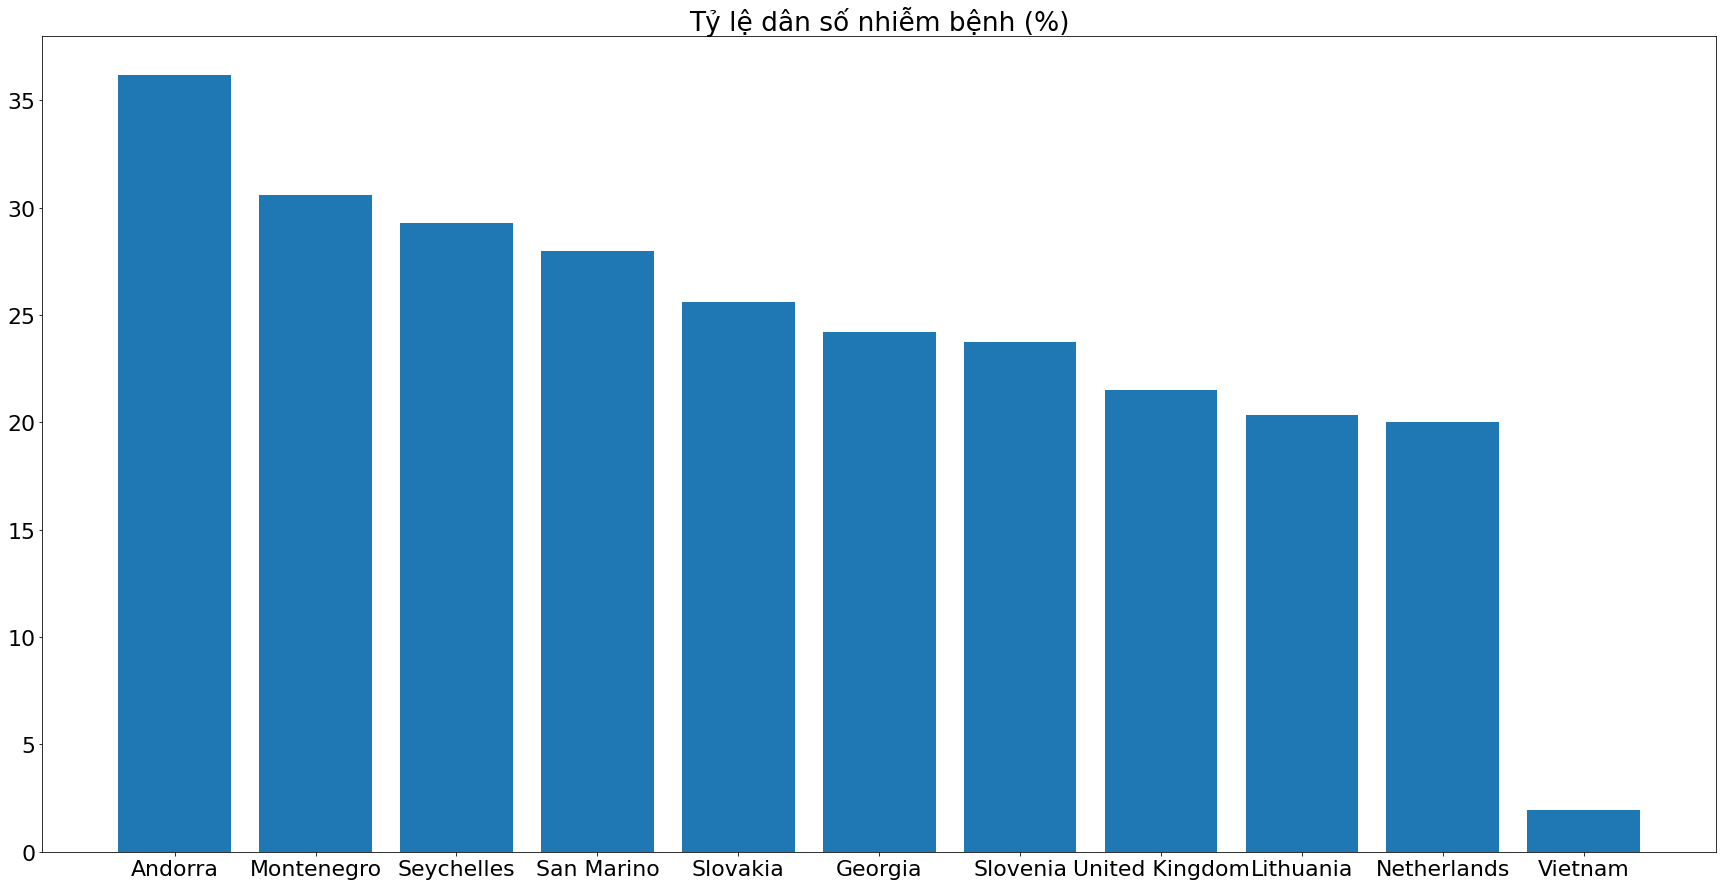

In [17]:
plt.title("Tỷ lệ dân số nhiễm bệnh (%)")
df6 = confirmed_population.sort_values('confirmed_rate',ascending = False).head(10)
entry = confirmed_population.loc[confirmed_population['Country/Region'] == 'Vietnam']
df6 = pd.concat([df6,entry])

# Make a random dataset:
height = df6["confirmed_rate"]
bars = df6["Country/Region"]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars)
    
# Show graphic
plt.rcParams["figure.figsize"]=(30, 15)
plt.show()

# Region

In [18]:
location = pd.read_csv("countryContinent.csv", encoding= 'unicode_escape')
location["country"] = location["country"].replace("United States", 'US')
location

,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Åland Islands,AX,ALA,248,ISO 3166-2:AX,Europe,Northern Europe,150.0,154.0
2,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
3,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
4,American Samoa,AS,ASM,16,ISO 3166-2:AS,Oceania,Polynesia,9.0,61.0
...,...,...,...,...,...,...,...,...,...
244,Wallis and Futuna,WF,WLF,876,ISO 3166-2:WF,Oceania,Polynesia,9.0,61.0
245,Western Sahara,EH,ESH,732,ISO 3166-2:EH,Africa,Northern Africa,2.0,15.0
246,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,142.0,145.0
247,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Eastern Africa,2.0,14.0


In [19]:
# Dữ liệu về châu lục, vùng lãnh thổ
confirmed_location = pd.merge(confirmed, location, left_on='Country/Region', right_on='country')
confirmed_location

,Country/Region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,Total,country,code_2,code_3,country_code,iso_3166_2,continent,sub_region,region_code,sub_region_code
0,Afghanistan,0,0,0,0,0,0,0,0,0,...,158394,Afghanistan,AF,AFG,4,ISO 3166-2:AF,Asia,Southern Asia,142.0,34.0
1,Albania,0,0,0,0,0,0,0,0,0,...,220487,Albania,AL,ALB,8,ISO 3166-2:AL,Europe,Southern Europe,150.0,39.0
2,Algeria,0,0,0,0,0,0,0,0,0,...,222639,Algeria,DZ,DZA,12,ISO 3166-2:DZ,Africa,Northern Africa,2.0,15.0
3,Andorra,0,0,0,0,0,0,0,0,0,...,27983,Andorra,AD,AND,20,ISO 3166-2:AD,Europe,Southern Europe,150.0,39.0
4,Angola,0,0,0,0,0,0,0,0,0,...,90316,Angola,AO,AGO,24,ISO 3166-2:AO,Africa,Middle Africa,2.0,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,Uzbekistan,0,0,0,0,0,0,0,0,0,...,200730,Uzbekistan,UZ,UZB,860,ISO 3166-2:UZ,Asia,Central Asia,142.0,143.0
165,Vanuatu,0,0,0,0,0,0,0,0,0,...,7,Vanuatu,VU,VUT,548,ISO 3166-2:VU,Oceania,Melanesia,9.0,54.0
166,Yemen,0,0,0,0,0,0,0,0,0,...,10197,Yemen,YE,YEM,887,ISO 3166-2:YE,Asia,Western Asia,142.0,145.0
167,Zambia,0,0,0,0,0,0,0,0,0,...,284389,Zambia,ZM,ZMB,894,ISO 3166-2:ZM,Africa,Eastern Africa,2.0,14.0


In [20]:
confirmed_location_continent_group = confirmed_location.groupby(by=["continent"],as_index=False).sum()
confirmed_location_continent_group

,continent,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,Total,country_code,region_code,sub_region_code
0,Africa,0,0,0,0,0,0,0,0,0,...,51731,56711,47137,41988,27263,30716,9845535,22440,98.0,684.0
1,Americas,0,0,0,0,1,0,1,0,0,...,206743,253199,257929,238507,372061,268855,50943739,11230,608.0,552.0
2,Asia,554,96,280,492,674,805,2643,585,2064,...,224170,274064,298066,335428,346412,382127,77361726,16170,5396.0,3499.0
3,Europe,0,0,2,1,0,1,4,2,0,...,1064960,820544,1030576,711606,637610,824037,69560430,15897,5850.0,4384.0
4,Oceania,0,0,0,0,4,1,0,1,3,...,76131,78383,98133,113663,72925,94467,1248163,5191,99.0,615.0


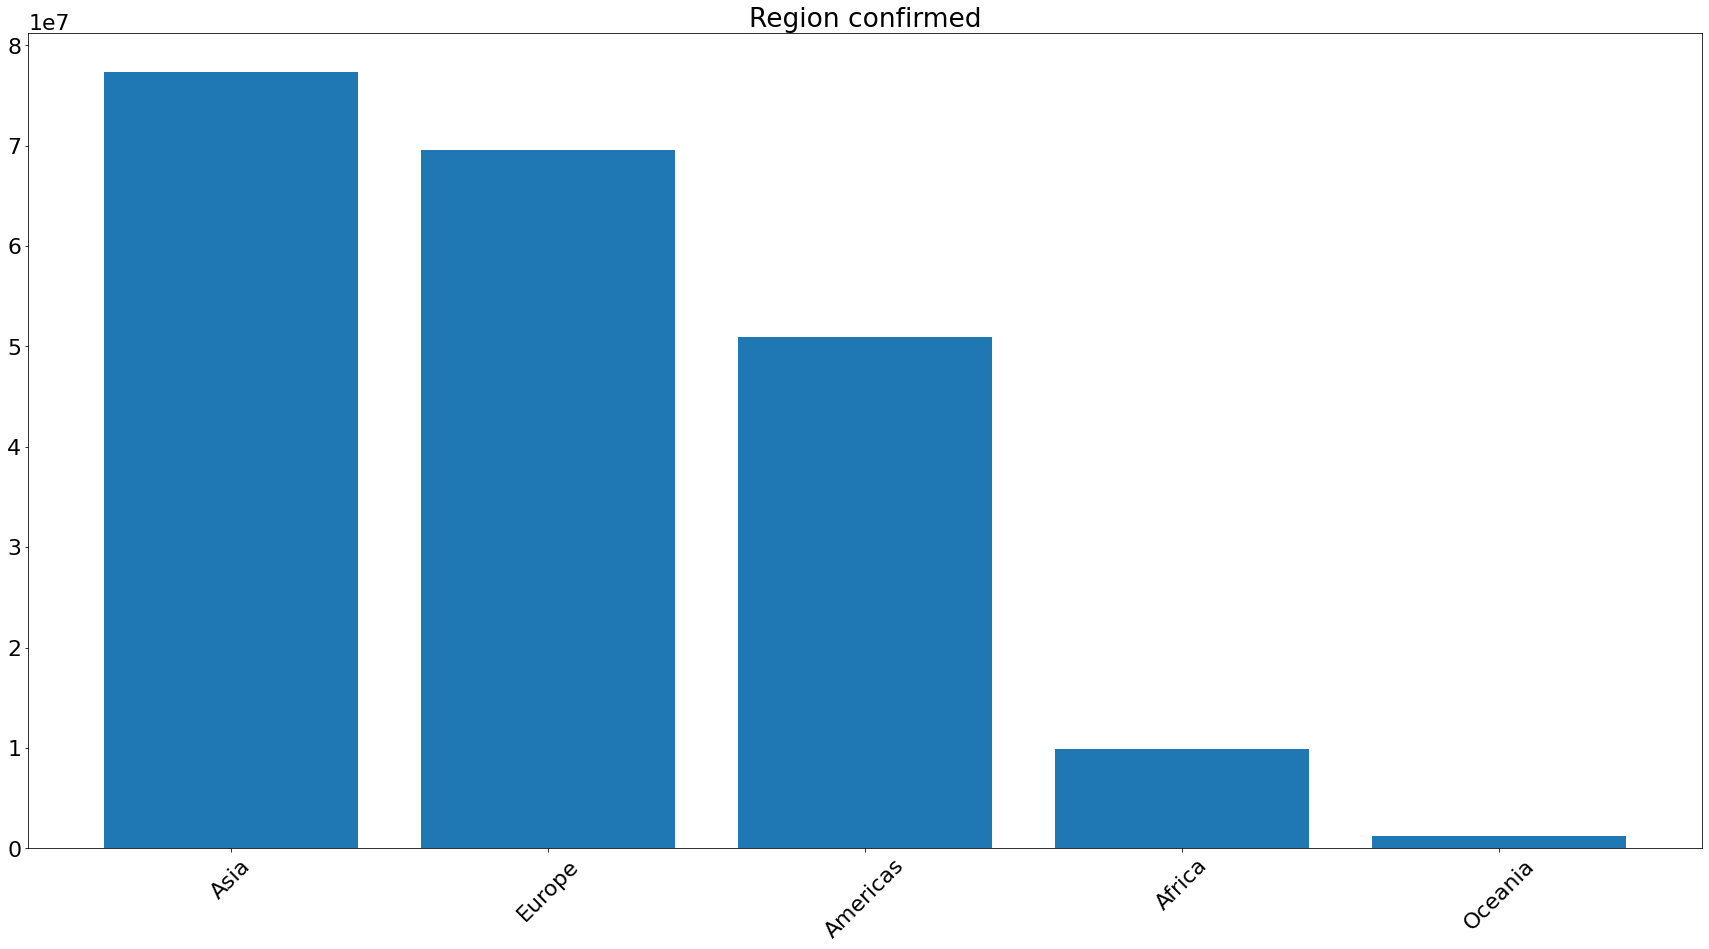

In [21]:
plt.title("Region confirmed")
df9 = confirmed_location_continent_group.sort_values('Total',ascending = False)

# Make a random dataset:
height = df9["Total"]
bars = df9["continent"]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=45)

# Show graphic
plt.rcParams["figure.figsize"]=(35, 15)
plt.show()

In [22]:
confirmed_population_location = pd.merge(confirmed_population, location, left_on='Country/Region', right_on='country')
confirmed_population_location_continent_group = confirmed_population_location.groupby(by=["continent"],as_index=False).sum()
confirmed_population_location_continent_group["confirmed_rate"] = confirmed_population_location_continent_group["Total"]/confirmed_population_location_continent_group["2021_last_updated"]*100

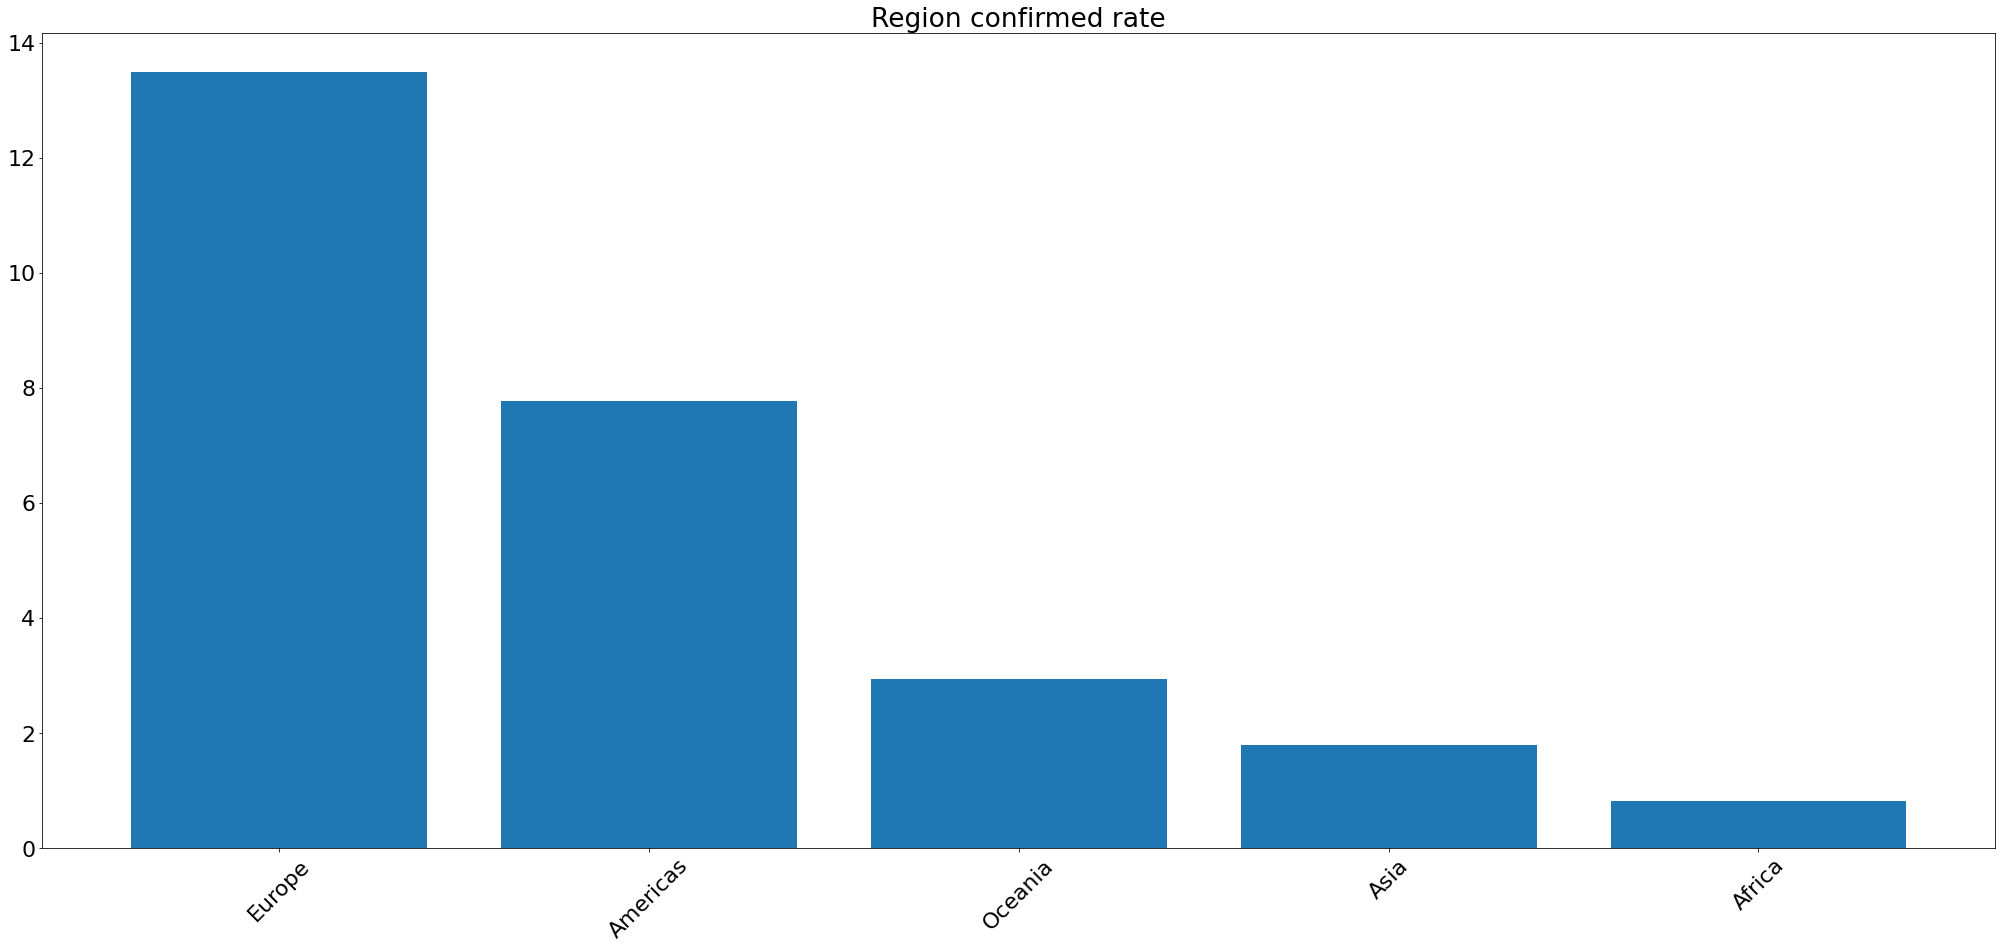

In [23]:
plt.title("Region confirmed rate")
df11 = confirmed_population_location_continent_group.sort_values('confirmed_rate',ascending = False)

# Make a random dataset:
height = df11["confirmed_rate"]
bars = df11["continent"]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height)

# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=45)

# Show graphic
plt.rcParams["figure.figsize"]=(35, 15)
plt.show()

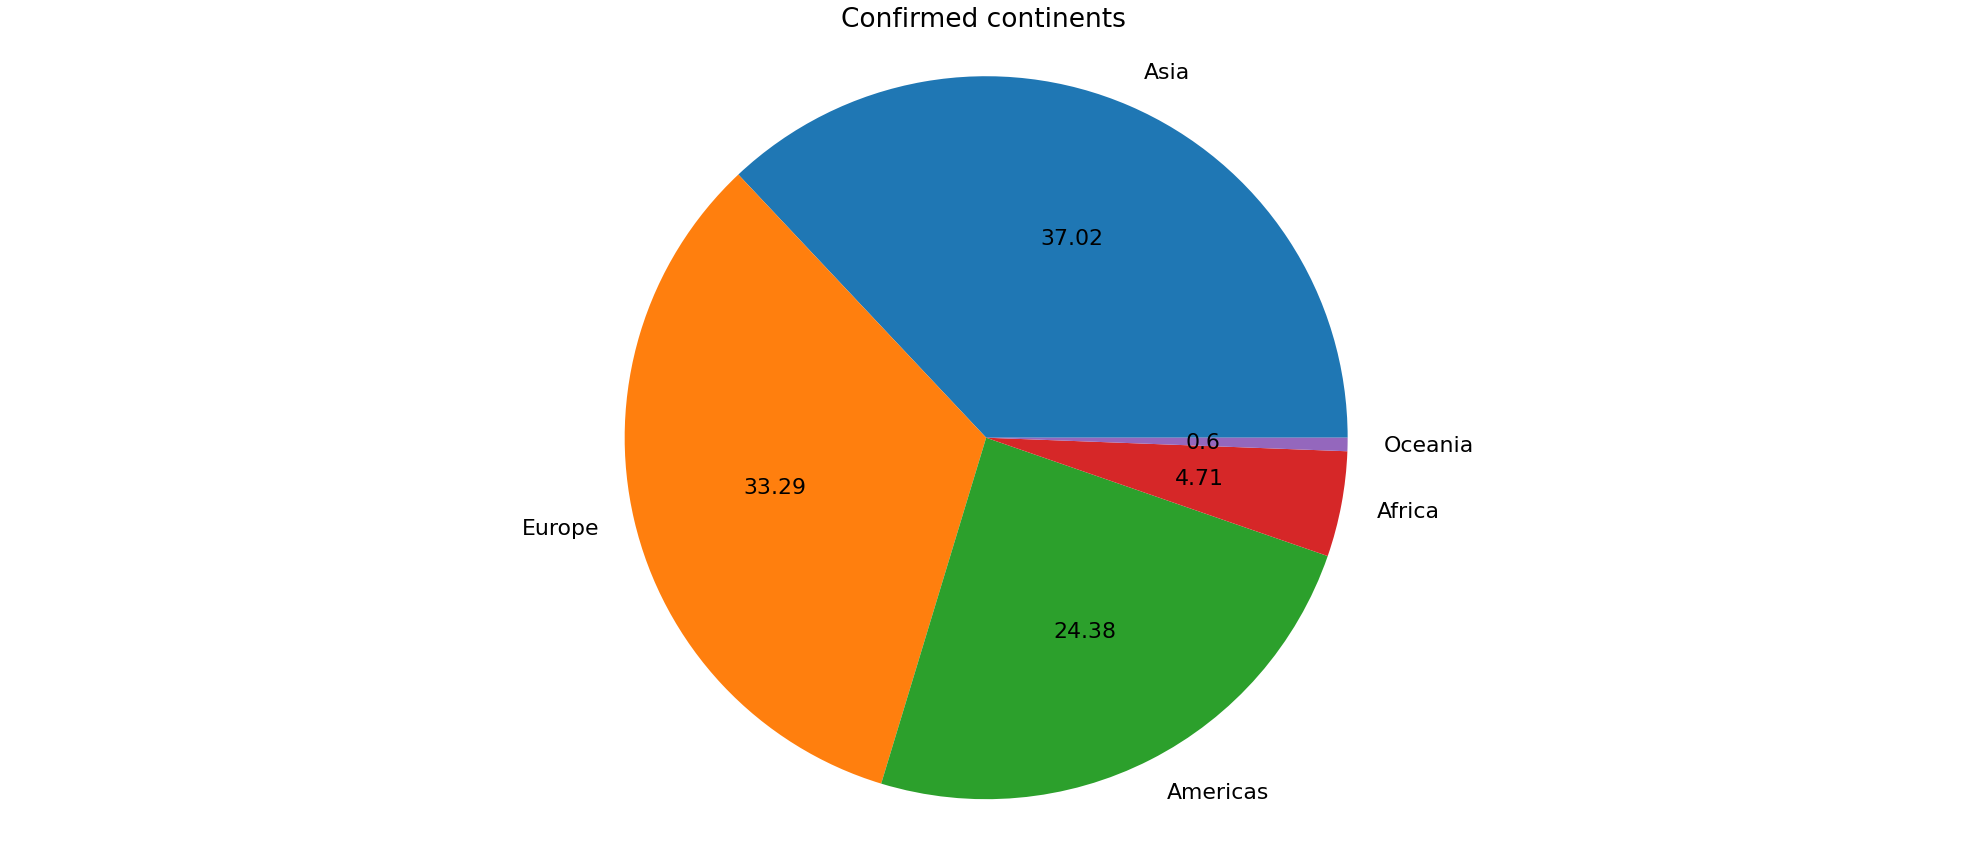

In [24]:
labels = df9["continent"]
sizes = df9["Total"]

def absolute_value(val):
    return np.round(val,2)

plt.pie(sizes, labels=labels,
        autopct=absolute_value)
plt.title("Confirmed continents")
plt.axis('equal')
plt.show()

# Asia region

In [25]:
confirmed_location_subregion_group = confirmed_location[confirmed_location["continent"] == "Asia"].groupby(by=["sub_region"],as_index=False).sum()
confirmed_location_subregion_group

,sub_region,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,Total,country_code,region_code,sub_region_code
0,Central Asia,0,0,0,0,0,0,0,0,0,...,736,352,498,5795,2646,2817,1488276,2437,568.0,572.0
1,Eastern Asia,550,95,277,486,671,802,2635,578,2058,...,3267,4495,8059,8488,9903,7671,2283721,1044,426.0,90.0
2,South-Eastern Asia,4,1,3,5,3,2,8,3,5,...,15114,31755,33194,39819,41376,44871,12758406,3634,994.0,245.0
3,Southern Asia,0,0,0,1,0,1,0,0,1,...,94092,120931,146025,163949,184617,174067,40464671,2190,1136.0,272.0
4,Western Asia,0,0,0,0,0,0,0,4,0,...,110961,116531,110290,117377,107870,152701,20366652,6865,2272.0,2320.0


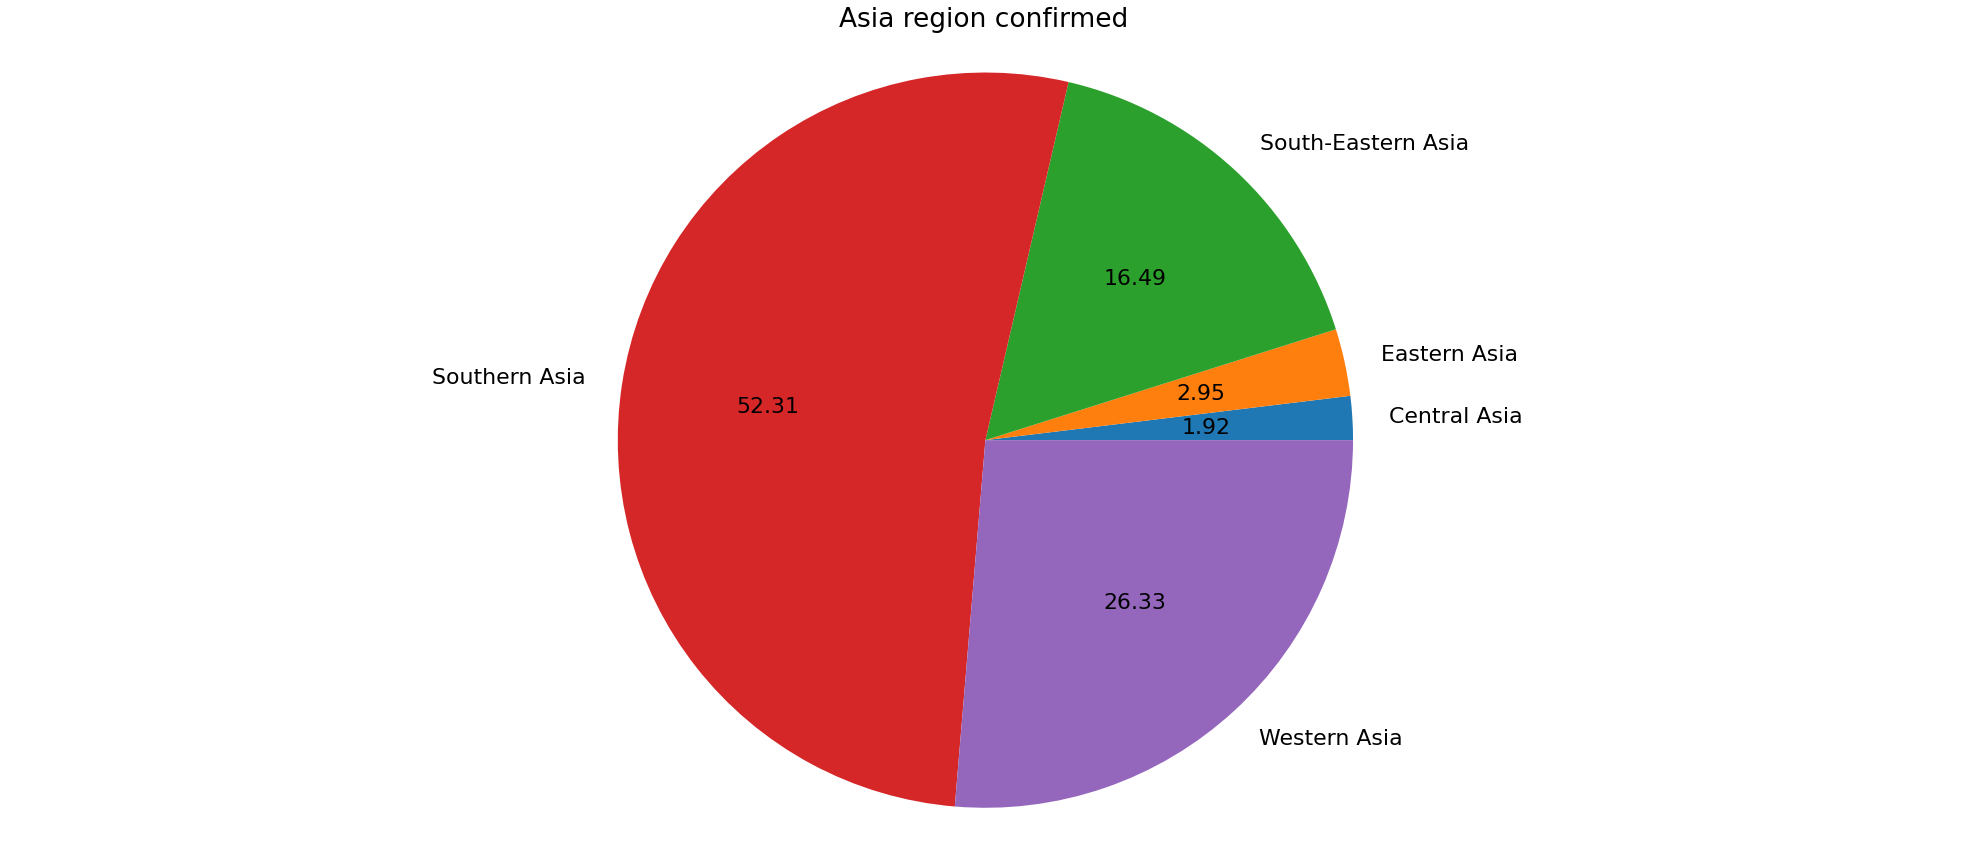

In [26]:
labels = confirmed_location_subregion_group["sub_region"]
sizes = confirmed_location_subregion_group["Total"]

def absolute_value(val):
    return np.round(val, 2)

plt.pie(sizes, labels=labels,
        autopct=absolute_value)
plt.title("Asia region confirmed")
plt.axis('equal')
plt.show()

In [27]:
death_location = pd.merge(death, location, left_on='Country/Region', right_on='country')
death_location_continent_group = death_location.groupby(by=["continent"],as_index=False).sum()
death_location_continent_group

,continent,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,...,1/5/22,1/6/22,1/7/22,1/8/22,1/9/22,1/10/22,Total,country_code,region_code,sub_region_code
0,Africa,0,0,0,0,0,0,0,0,0,...,278,771,337,310,253,294,226762,22440,98.0,684.0
1,Americas,0,0,0,0,0,0,0,0,0,...,408,405,424,428,834,615,1567701,11230,608.0,552.0
2,Asia,17,1,8,16,14,26,49,2,38,...,676,720,732,861,480,714,1068657,16170,5396.0,3499.0
3,Europe,0,0,0,0,0,0,0,0,0,...,2753,2063,1653,1119,719,1667,1038483,15897,5850.0,4384.0
4,Oceania,0,0,0,0,0,0,0,0,0,...,14,20,16,34,21,33,3772,5191,99.0,615.0


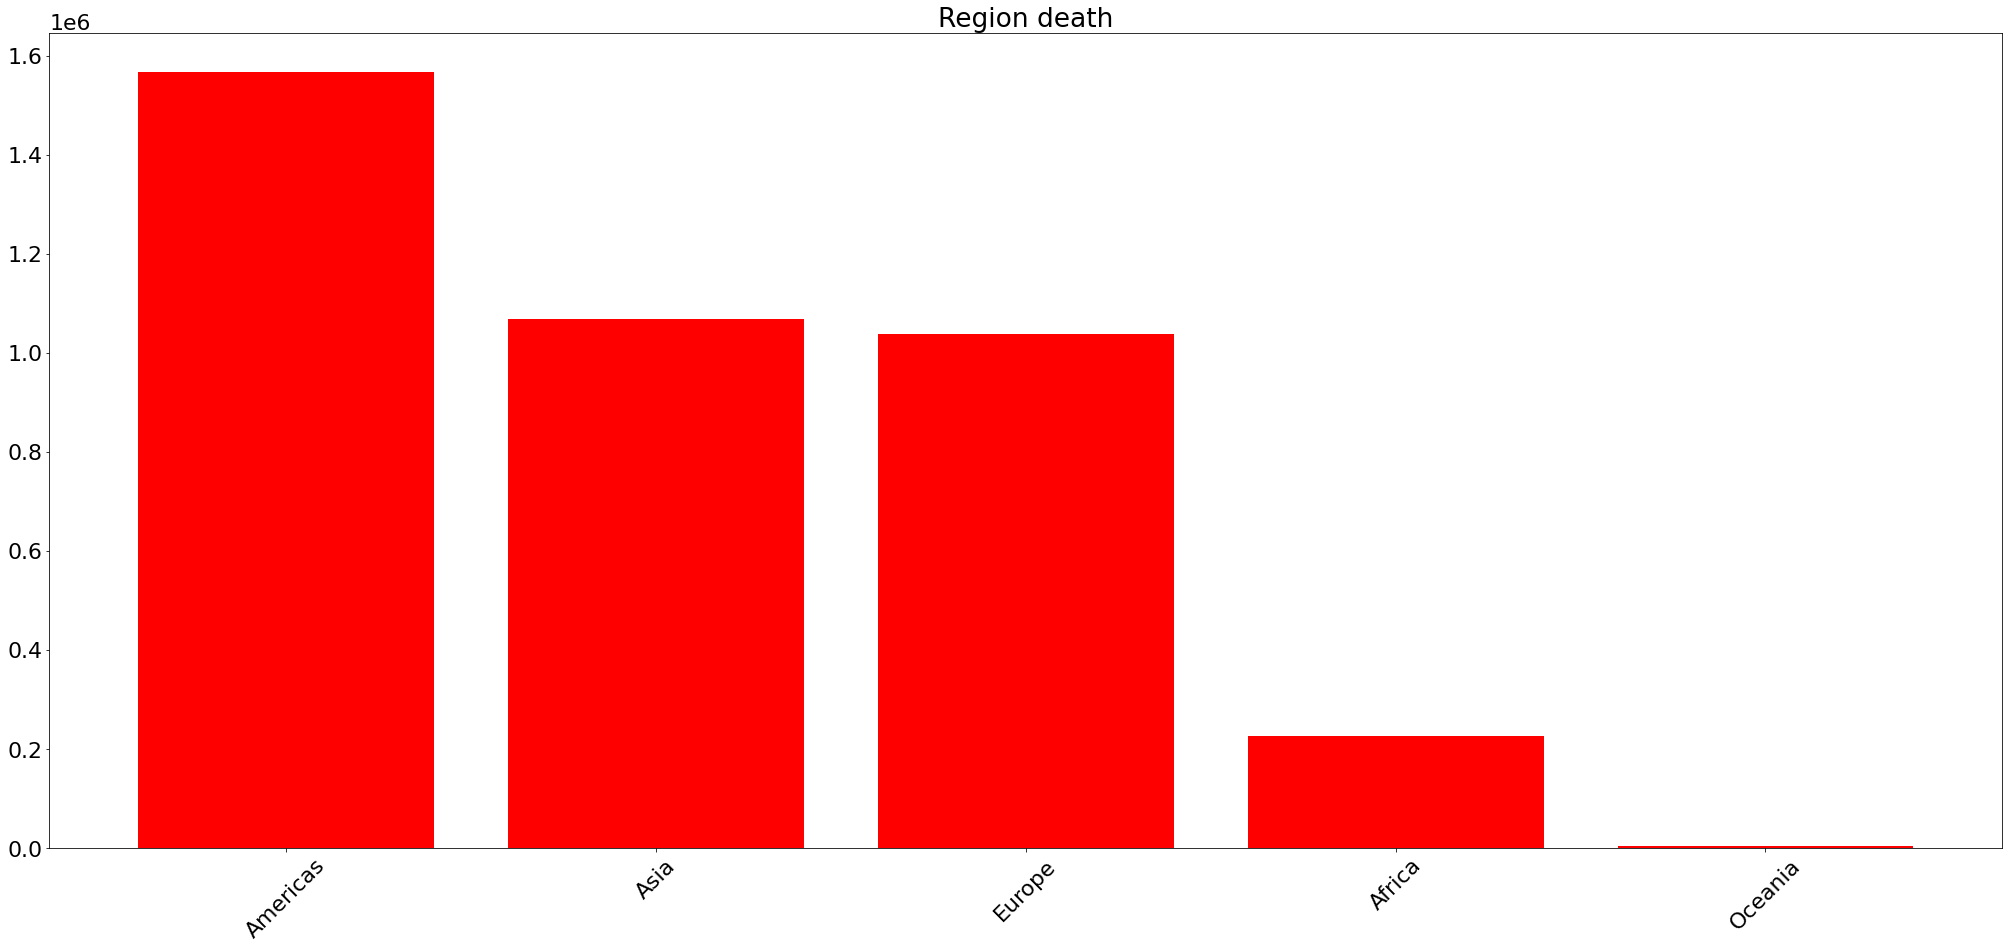

In [28]:
plt.title("Region death")
df10 = death_location_continent_group.sort_values('Total',ascending = False)

# Make a random dataset:
height = df10["Total"]
bars = df10["continent"]
y_pos = np.arange(len(bars))

# Create bars
plt.bar(y_pos, height, color = 'r')

# Create names on the x-axis
plt.xticks(y_pos, bars, rotation=45)

# Show graphic
plt.rcParams["figure.figsize"]=(35, 15)
plt.show()

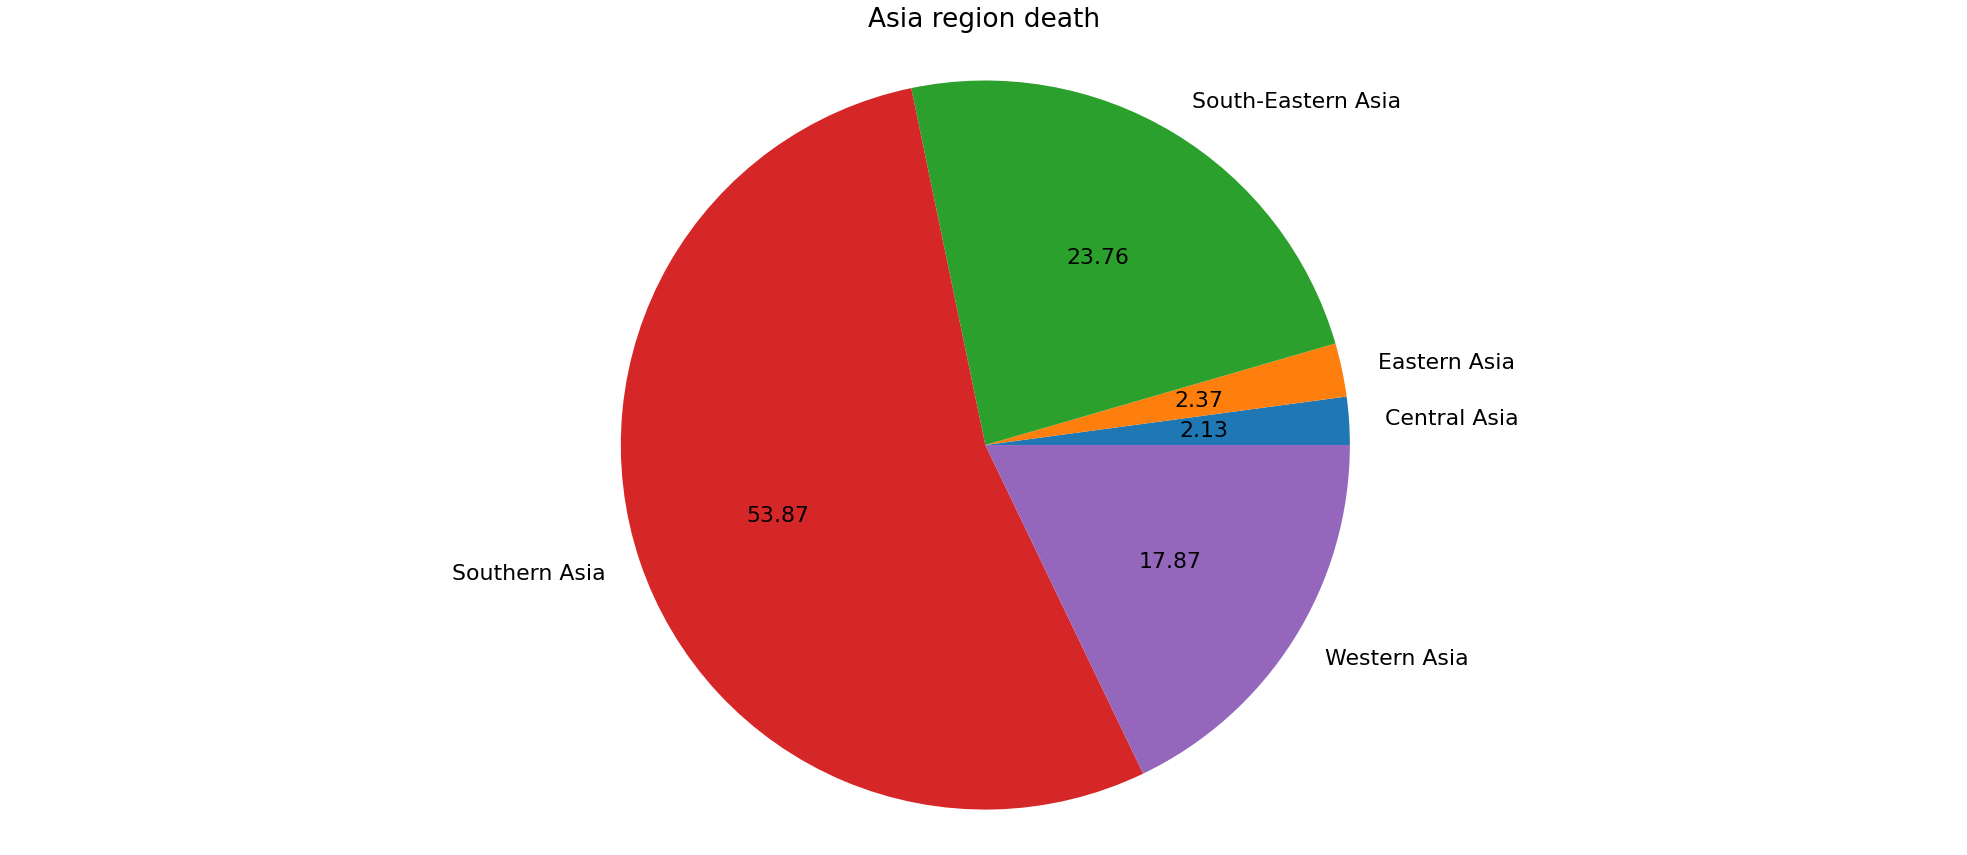

In [29]:
death_location_subregion_group = death_location[death_location["continent"] == "Asia"].groupby(by=["sub_region"],as_index=False).sum()
labels = death_location_subregion_group["sub_region"]
sizes = death_location_subregion_group["Total"]

def absolute_value(val):
    return np.round(val, 2)

plt.pie(sizes, labels=labels,
        autopct=absolute_value)
plt.title("Asia region death")
plt.axis('equal')
plt.show()

## Vietnam time series

In [30]:
vn_cf_timesr = confirmed_new.loc[confirmed_new['Country/Region'] == "Vietnam"]
vn_d_timesr = death_new.loc[death_new['Country/Region'] == "Vietnam"]

In [31]:
vn_cf_timesr = vn_cf_timesr.drop('Country/Region', 1)
vn_d_timesr = vn_d_timesr.drop('Country/Region', 1)

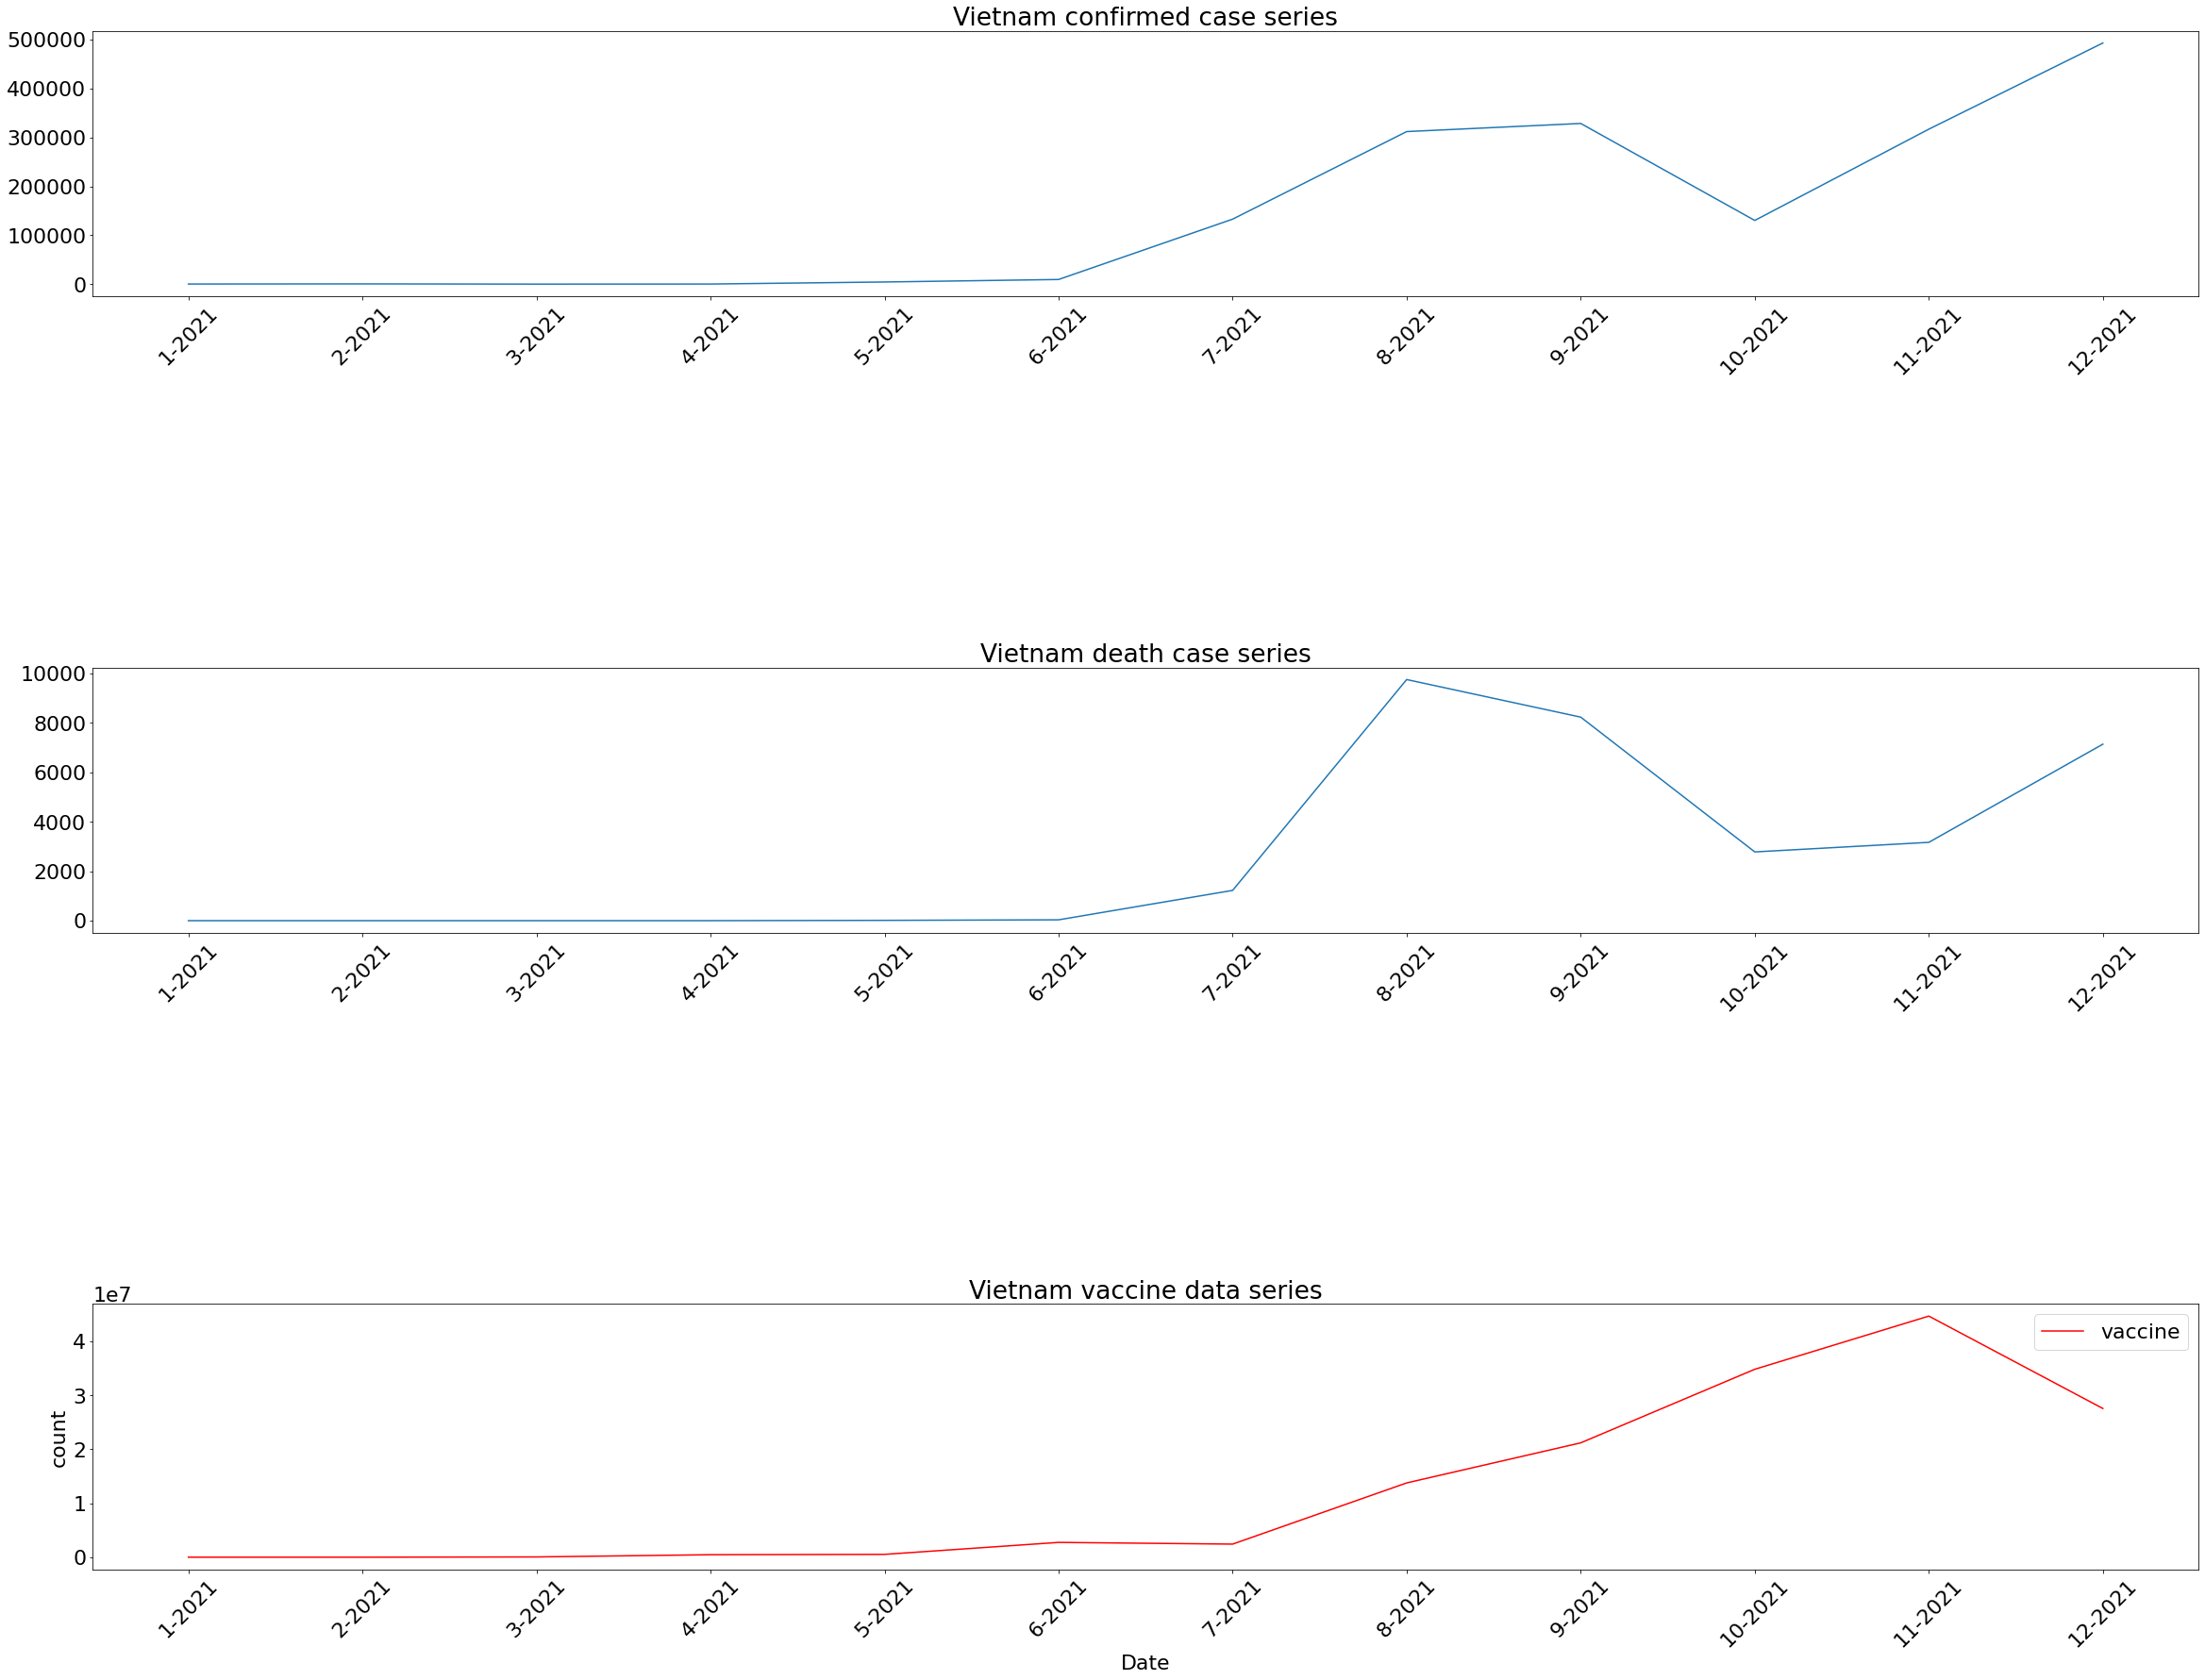

In [85]:
vaccine = spark.read.format("csv").option("header", "true").load("hdfs://namenode:9000/nifi/vaccine_doses_admin{}.csv".format(str(date.today()))).toPandas()
vaccine=vaccine.drop('UID', 1)
vaccine=vaccine.drop('FIPS',1)
vaccine=vaccine.drop('iso3',1)
vaccine=vaccine.drop('Admin2', 1)
vaccine=vaccine.drop('iso2',1)
vaccine=vaccine.drop('code3', 1)
vaccine=vaccine.drop('Province_State', 1)
vaccine=vaccine.drop('Lat', 1)
vaccine=vaccine.drop('Long_', 1)
vaccine=vaccine.drop('Combined_Key', 1)
vaccine=vaccine.drop('Population', 1)

vaccine = vaccine.fillna(value=0)
vaccine=vaccine.astype(dict.fromkeys(vaccine.columns[1:], 'int64'),errors='ignore')

vaccine = vaccine.groupby(by=["Country_Region"],as_index=False).sum()

list_day_vaccine=vaccine.columns.tolist()[2:]
list_day_vaccine.reverse()
for i in range(len(list_day_vaccine)):
    if  i != len(list_day_vaccine)-1:
        vaccine[list_day_vaccine[i]]=vaccine[list_day_vaccine[i]]-vaccine[list_day_vaccine[i+1]]

from datetime import datetime
list_day_vaccine=vaccine.columns.tolist()[1:-1]
list_month_vaccine=[]
for day in list_day_vaccine:
    _time=datetime.strptime(day, "%Y-%m-%d")
    list_month_vaccine.append(str(_time.month)+"-"+str(_time.year))
list_month_vaccine=list(set(list_month_vaccine))

for month in list_month_vaccine:
    list_day_sum=[]
    for day in list_day_vaccine:
        _time=datetime.strptime(day, "%Y-%m-%d") 
        if str(_time.month)==str(month.split('-')[0]) and str(_time.year) == str(month.split('-')[1]):          
            list_day_sum.append(day)
    vaccine[month]=vaccine[list_day_sum].sum(axis=1)
list_month_vaccine=sorted(list_month_vaccine, key=lambda x: datetime.strptime(x, '%m-%Y'))
list_month_vaccine.append("Country_Region")
vaccine_month=vaccine[list_month_vaccine]
# vaccine_month

vaccine_month_VN = vaccine_month[vaccine_month["Country_Region"]=="Vietnam"]


X = vn_cf_timesr.columns[12:24]
Y = vn_cf_timesr.values.flatten().tolist()[12:24]
Z = vaccine_month_VN.values.flatten().tolist()[1:13]
T = vn_d_timesr.values.flatten().tolist()[12:24] 


plt.figure(figsize=(40, 30))

plt.subplot(511)
plt.plot(X, Y, label='confirmed')  # Plot some data on the (implicit) axes.
plt.title("Vietnam confirmed case series")
plt.xticks(rotation=45)

plt.subplot(513)
plt.title("Vietnam death case series")
plt.plot(X, T, label='death')  # Plot some data on the (implicit) axes.
plt.xticks(rotation=45)

plt.subplot(515)
plt.title("Vietnam vaccine data series")
plt.plot(X, Z, label='vaccine', color='red')  # etc.
# ax = plt.gca()
# ax.axes.xaxis.set_ticks([i for i in range(len(x) + 1) if i % 30 ==0])
plt.xticks(rotation=45)
plt.xlabel('Date',)
plt.ylabel('count')
plt.legend();

# Data from WHO

In [34]:
who_data = spark.read.format("csv").option("header", "true").load("hdfs://namenode:9000/nifi/WHO-COVID-19-global-data{}.csv".format(str(date.today()))).toPandas()
who_data=who_data.astype(dict.fromkeys(who_data.columns[4:], 'int64'),errors='ignore')
vaccin_data = spark.read.format("csv").option("header", "true").load("hdfs://namenode:9000/nifi/vaccination-data{}.csv".format(str(date.today()))).toPandas()
float_keys=['PERSONS_VACCINATED_1PLUS_DOSE','TOTAL_VACCINATIONS_PER100' , 'PERSONS_VACCINATED_1PLUS_DOSE_PER100', 'PERSONS_FULLY_VACCINATED','PERSONS_FULLY_VACCINATED_PER100']
dict_types=dict.fromkeys(float_keys, 'float64')
dict_types['TOTAL_VACCINATIONS']='int64'
vaccin_data=vaccin_data.astype(dict_types,errors='ignore')

vaccine_dosses_admin = spark.read.format("csv").option("header", "true").load("hdfs://namenode:9000/nifi/vaccine_doses_admin{}.csv".format(str(date.today()))).toPandas()

In [35]:
import  pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import date
from datetime import datetime

font = { 'family': 'DejaVu Sans',
    'weight' : "normal",
        'size'   : 22}
plt.rc('font', **font)
# who_data=pd.read_csv('WHO-COVID-19-global-data.csv')
# vaccin_data=pd.read_csv('vaccination-data.csv')
# vaccine_dosses_admin=pd.read_csv('time_series_covid19_vaccine_doses_admin_global.csv')

# Thống kê theo khu vực WHO

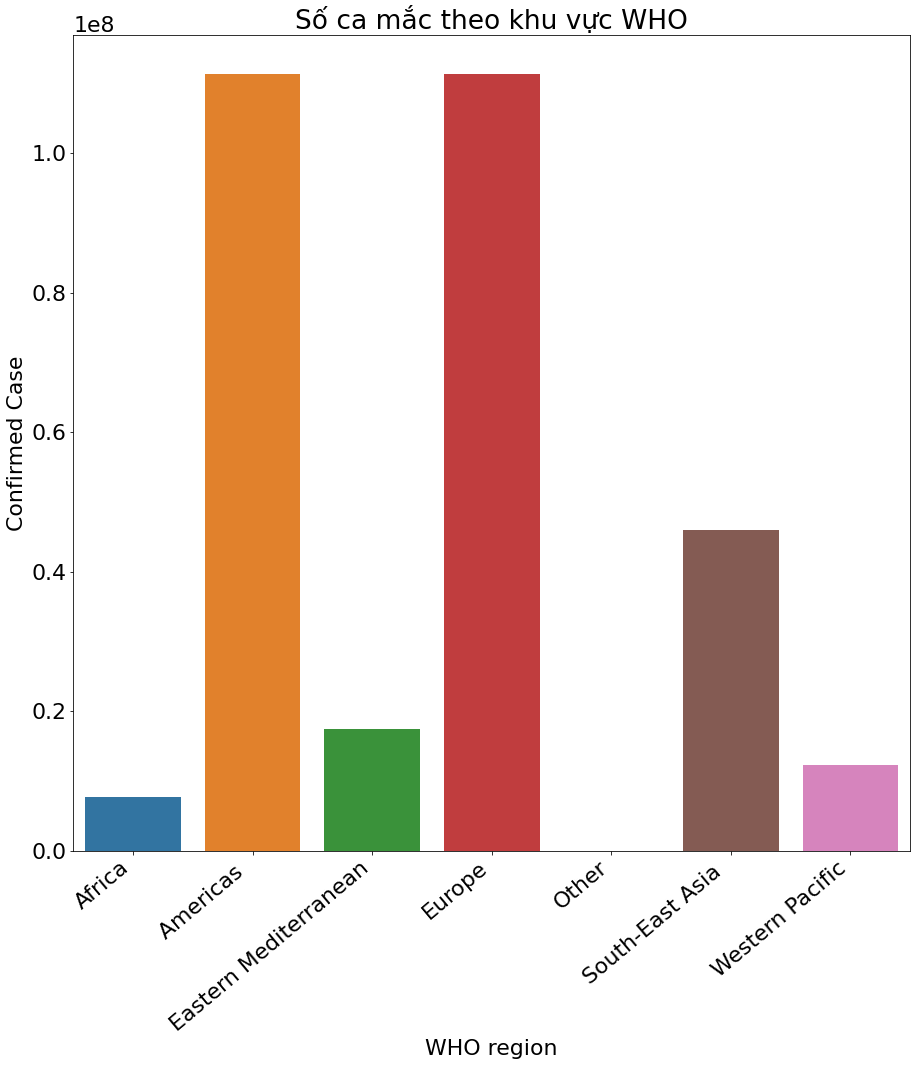

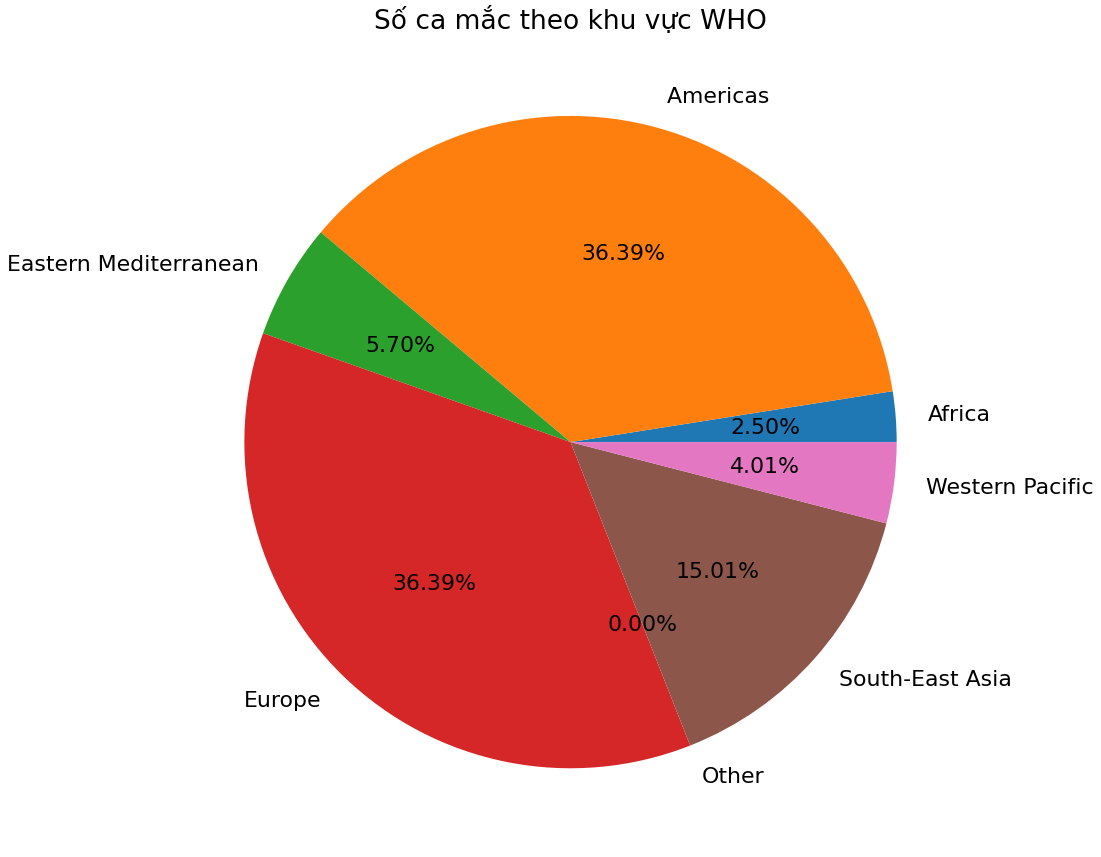

In [44]:
continents = who_data.groupby('WHO_region', as_index=False)['New_cases'].sum()
dict_who_region={'AMRO':'Americas ','AFRO':'Africa','SEARO':'South-East Asia ','EURO':'Europe','EMRO':'Eastern Mediterranean','WPRO':'Western Pacific'}
continents=continents.replace({"WHO_region": dict_who_region})
labels_continents=continents['WHO_region'].values.tolist()
data=continents['New_cases'].values.tolist()
plt.figure(figsize=(15,15))
ax=sns.barplot(x='WHO_region', y="New_cases", data=continents)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right")
plt.ylabel('Confirmed Case')
plt.xlabel('WHO region')
plt.title('Số ca mắc theo khu vực WHO')
plt.show()

plt.figure(figsize=(15,15))
plt.pie(data, labels=labels_continents, autopct='%1.2f%%')
plt.title('Số ca mắc theo khu vực WHO')
plt.show()

## Khu vực tây Thái Bình Dương

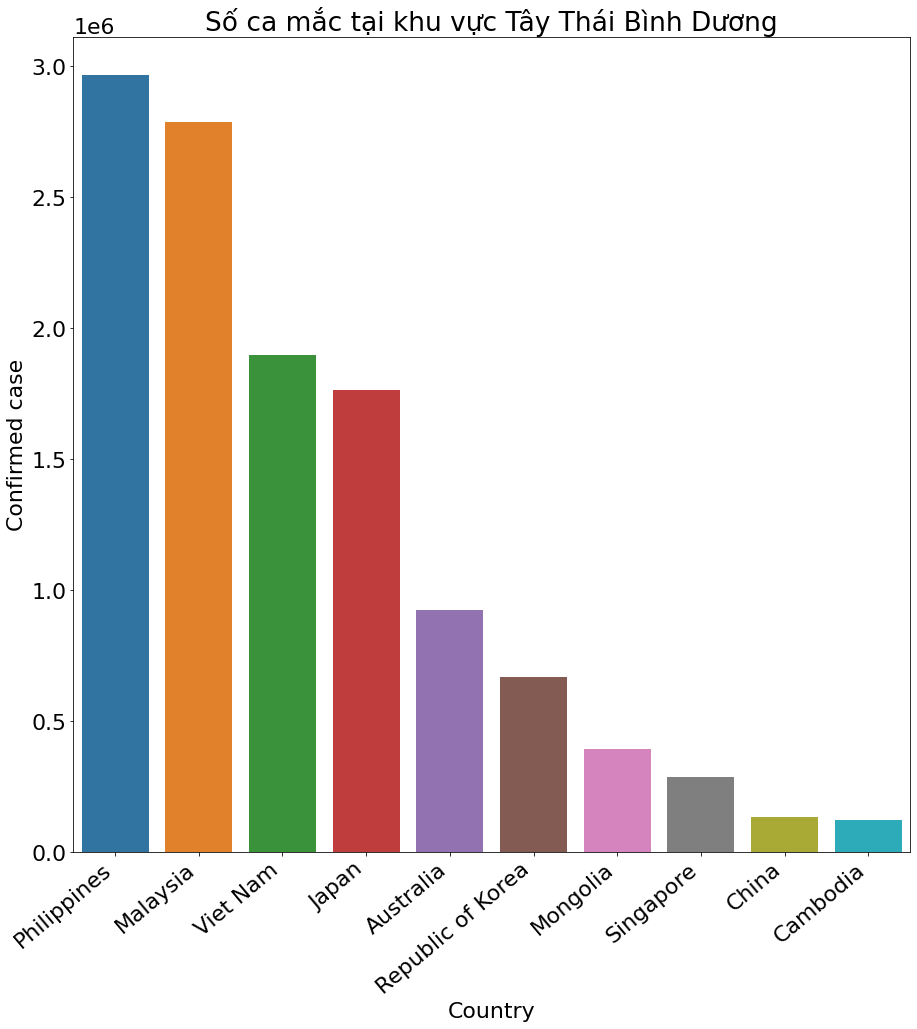

In [45]:
WPRO=who_data[who_data['WHO_region']=='WPRO']
WPRO=WPRO.groupby('Country', as_index=False)['New_cases'].sum()
WPRO=WPRO.sort_values(by='New_cases', ascending=False)
plt.figure(figsize=(15,15))
ax=sns.barplot(x='Country', y='New_cases', data=WPRO.head(10))
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right")
plt.ylabel("Confirmed case")
plt.title('Số ca mắc tại khu vực Tây Thái Bình Dương')
plt.show()

## Số ca theo ngày tại các quốc gia

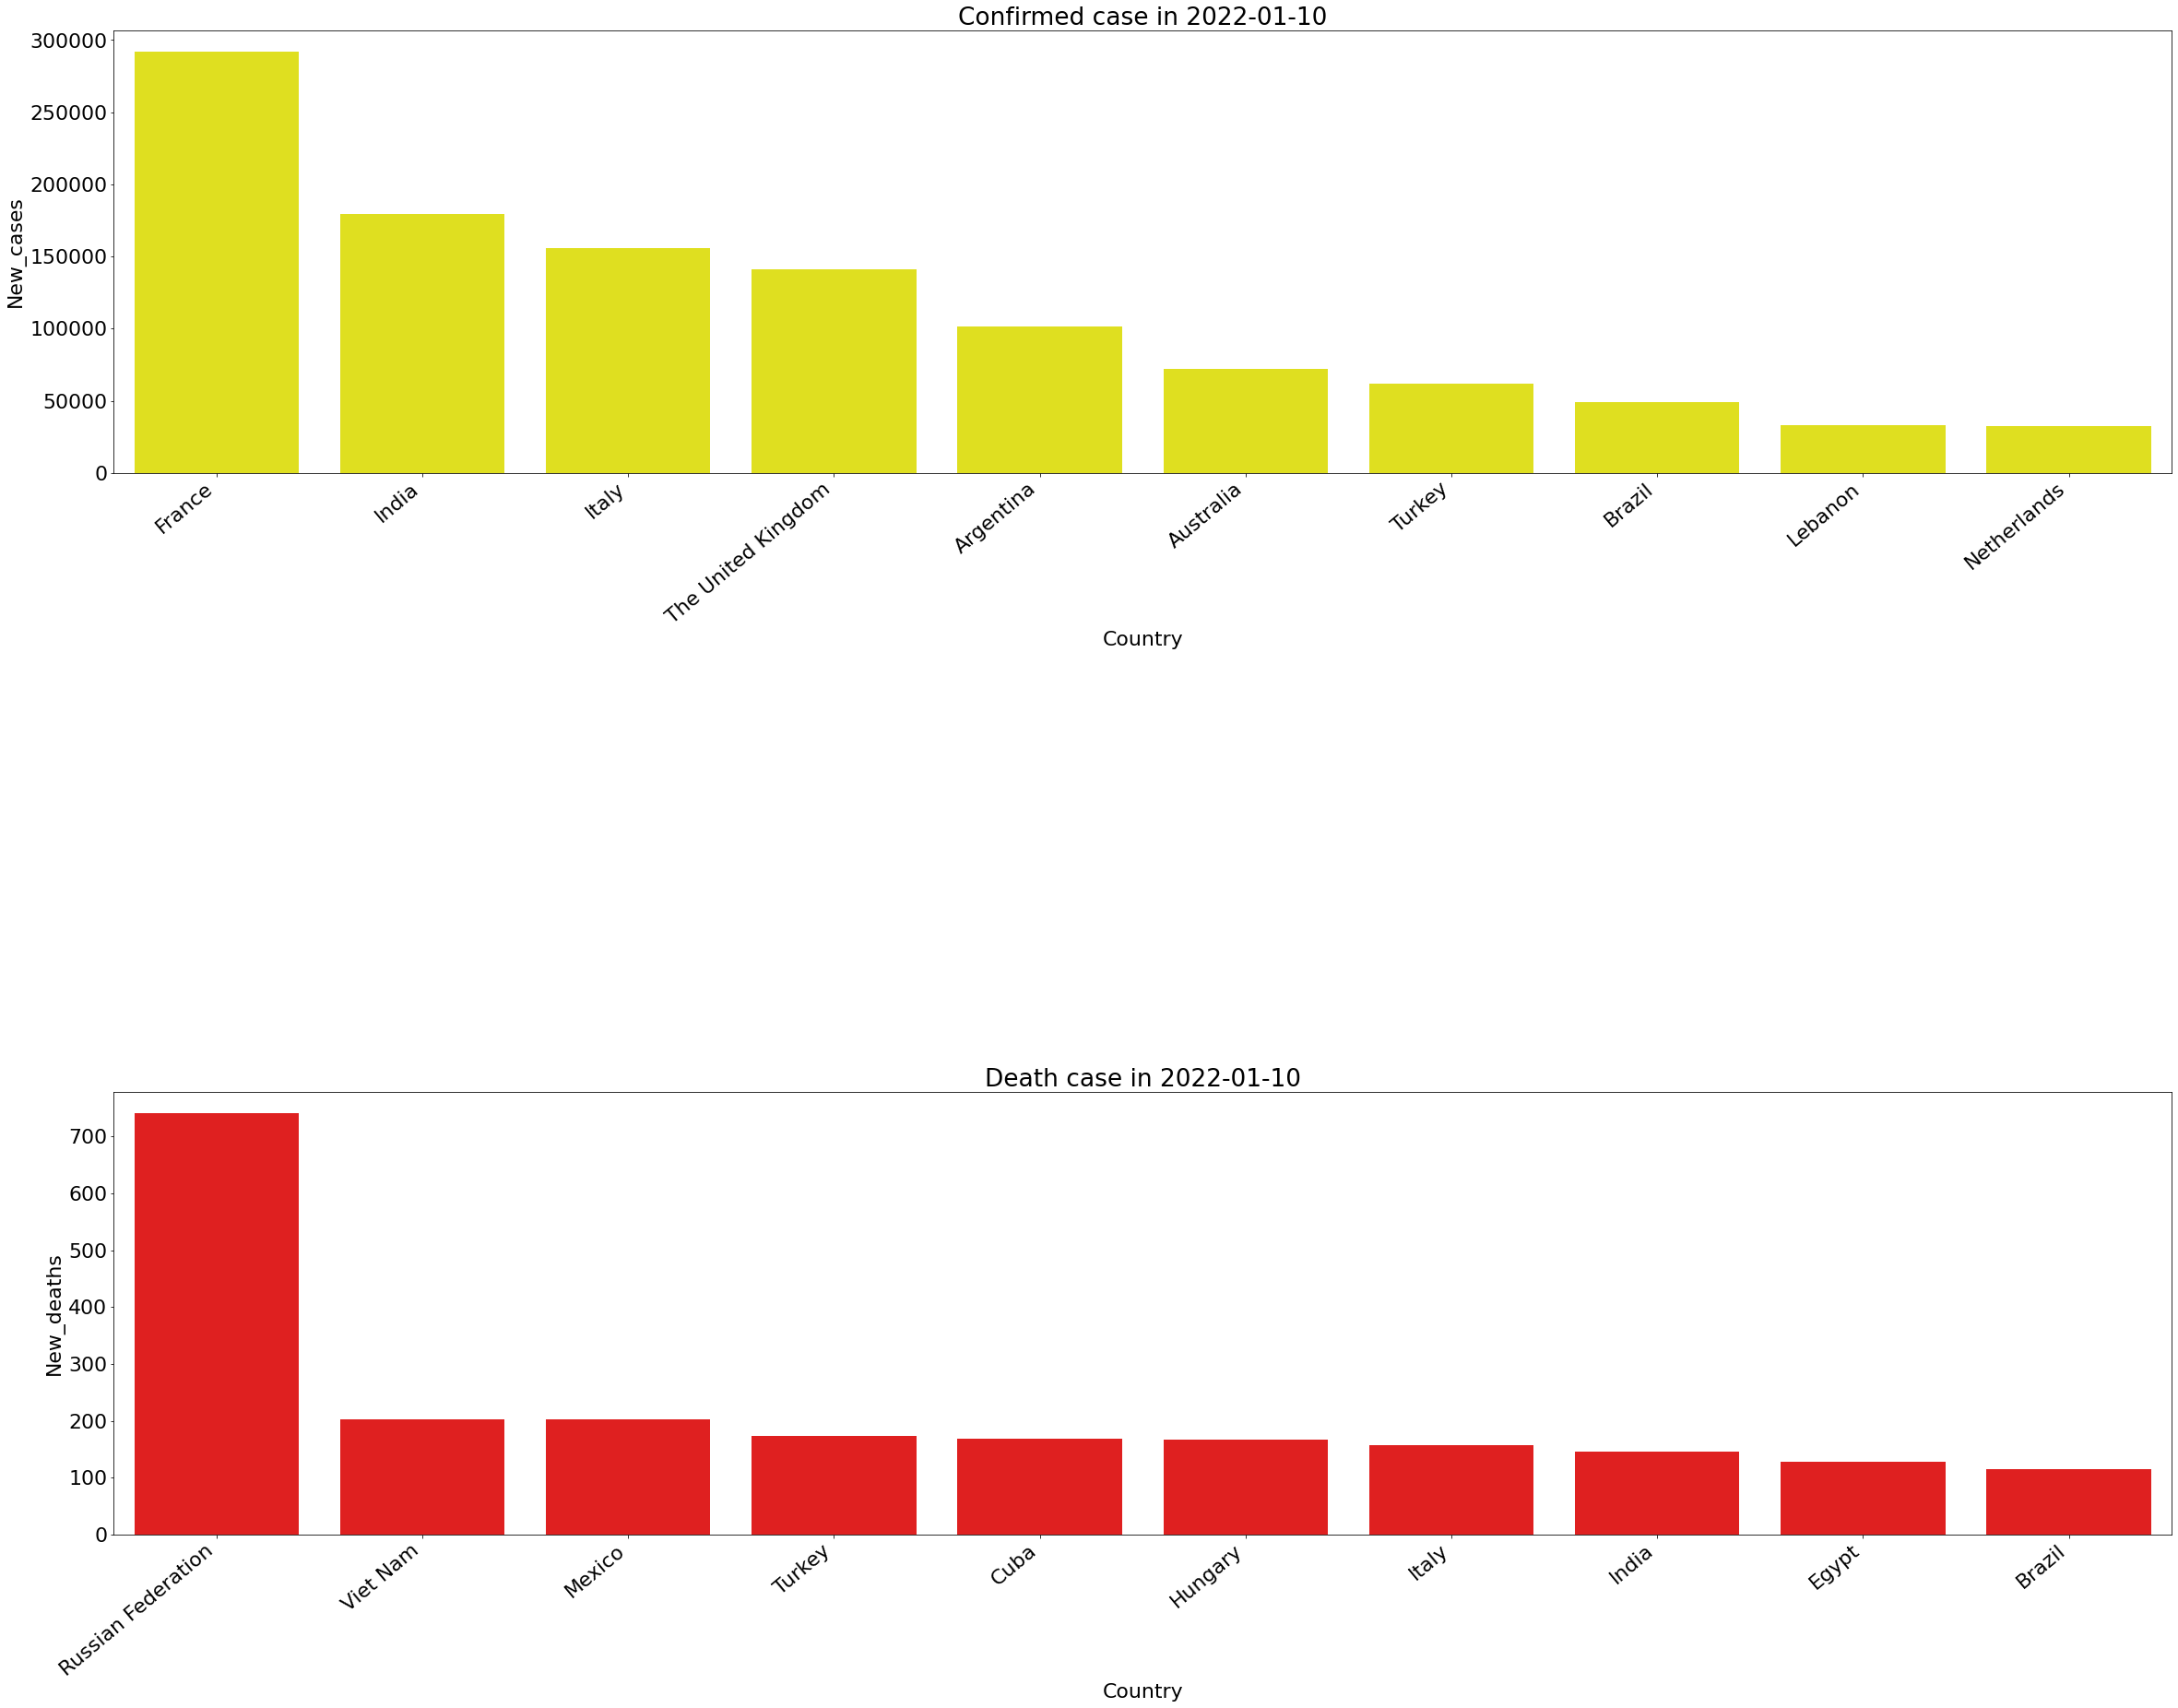

In [46]:
today=who_data['Date_reported'].values.tolist()[-1]
who_data_today=who_data[who_data['Date_reported'].astype("str")==today]
who_data_today_confired=who_data_today.sort_values(by='New_cases', ascending=False).head(10)
who_data_today_death=who_data_today.sort_values(by='New_deaths', ascending=False).head(10)
plt.figure(figsize=(40,30))
plt.subplot(311)
ax=sns.barplot(x='Country', y='New_cases', data=who_data_today_confired, color="yellow")
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right")
plt.title("Confirmed case in {}".format(today))
plt.subplot(313)
ax=sns.barplot(x='Country', y='New_deaths', data=who_data_today_death, color="red")
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right")
plt.title("Death case in {}".format(today))
plt.show()

## Tổng số ca đã ghi nhận tại các quốc gia

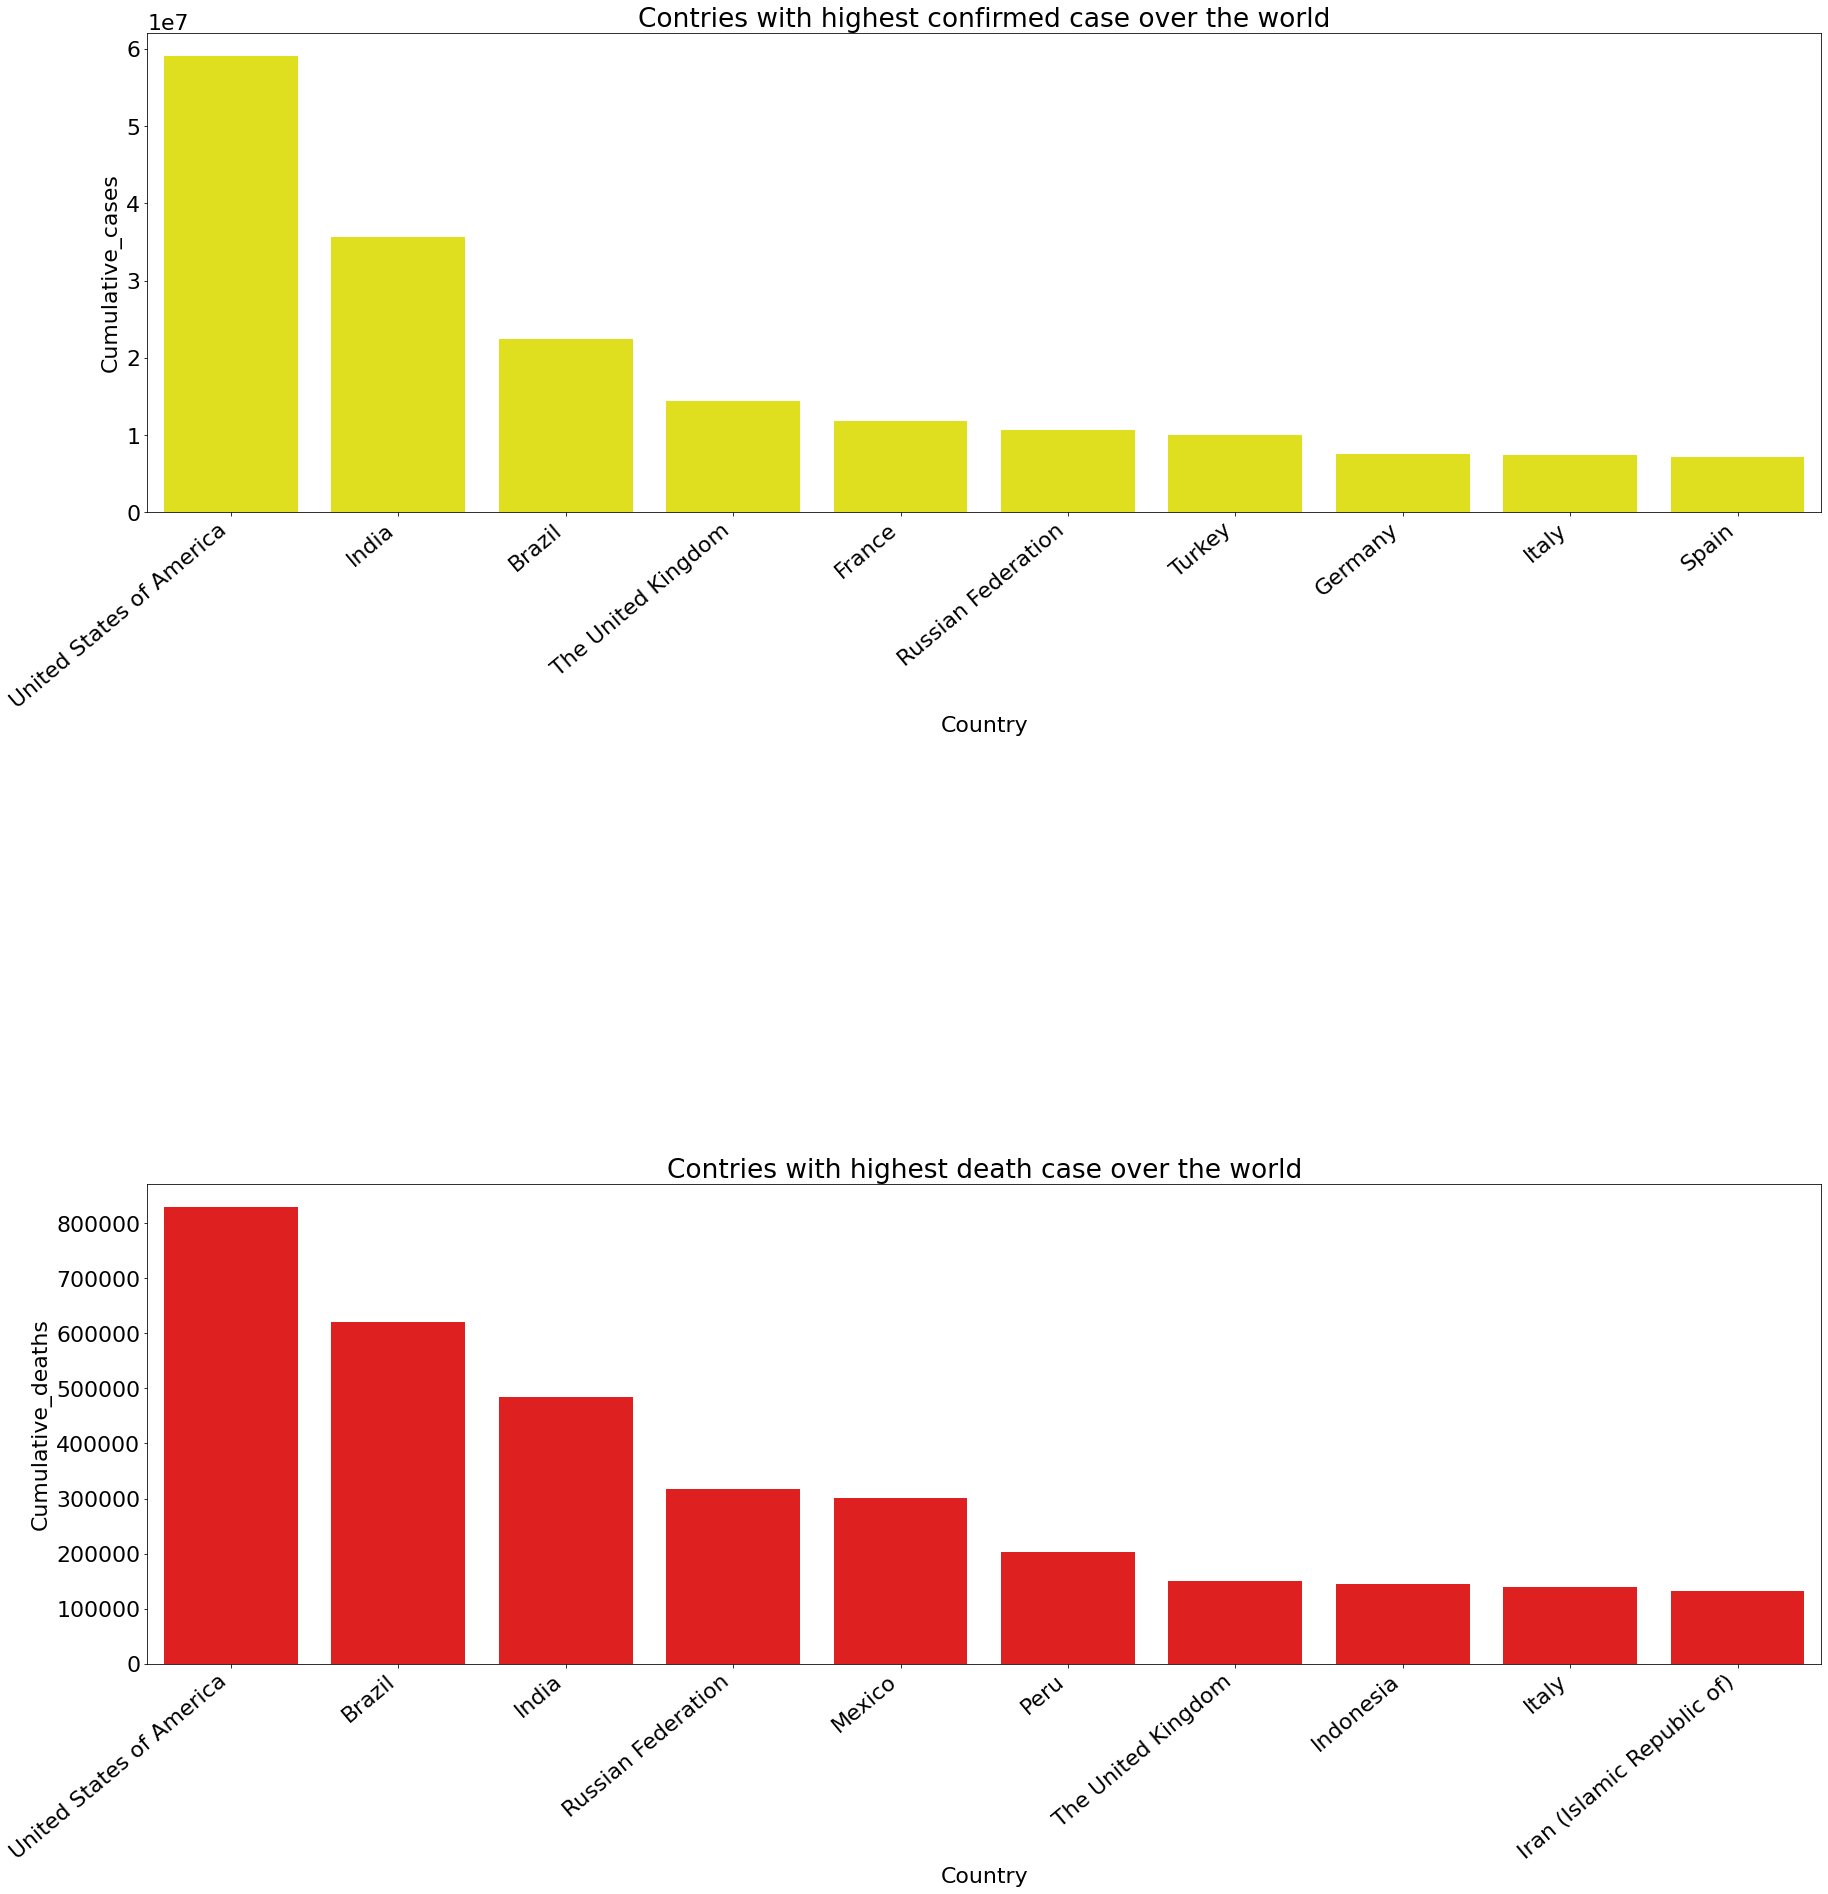

In [47]:
total_confirmed_case=who_data.groupby(['Country'], sort=False, as_index=False)['Cumulative_cases'].agg('max')
# total_confirmed_case=total_confirmed_case.sort_values(by='Cumulative_cases', ascending=False)
total_confirmed_case=pd.DataFrame(total_confirmed_case)
total_confirmed_case=total_confirmed_case.sort_values(by='Cumulative_cases', ascending=False)
plt.figure(figsize=(30,30))
plt.subplot(311)
ax=sns.barplot(x='Country', y='Cumulative_cases', data=total_confirmed_case.head(10), color="yellow")
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right")
plt.title("Contries with highest confirmed case over the world")
plt.subplot(313)
total_death_case=who_data.groupby(['Country'], sort=False, as_index=False)['Cumulative_deaths'].agg('max')
total_death_case=pd.DataFrame(total_death_case)
total_death_case=total_death_case.sort_values(by='Cumulative_deaths', ascending=False)
ax=sns.barplot(x='Country', y='Cumulative_deaths', data=total_death_case.head(10) ,color="red")
ax.set_xticklabels(ax.get_xticklabels(),rotation=40, ha="right")
plt.title("Contries with highest death case over the world")
plt.show()
# total_confirmed_case

## Ảnh hưởng của vắc xin đến số ca nhiễm tại các quốc gia

[1.         0.60380258 0.38045746 0.24476945 0.19993528 0.18036904
 0.16871634 0.12742535 0.1257555  0.12115555]
[0.86684272 0.74046582 0.89321485 0.90538387 0.93522946 0.5850998
 0.81052982 0.88283016 0.9572003  1.        ]
[0.80253414 0.59465784 0.8789305  0.9270073  0.97888663 0.57936793
 0.81802348 0.94680441 0.98783455 1.        ]


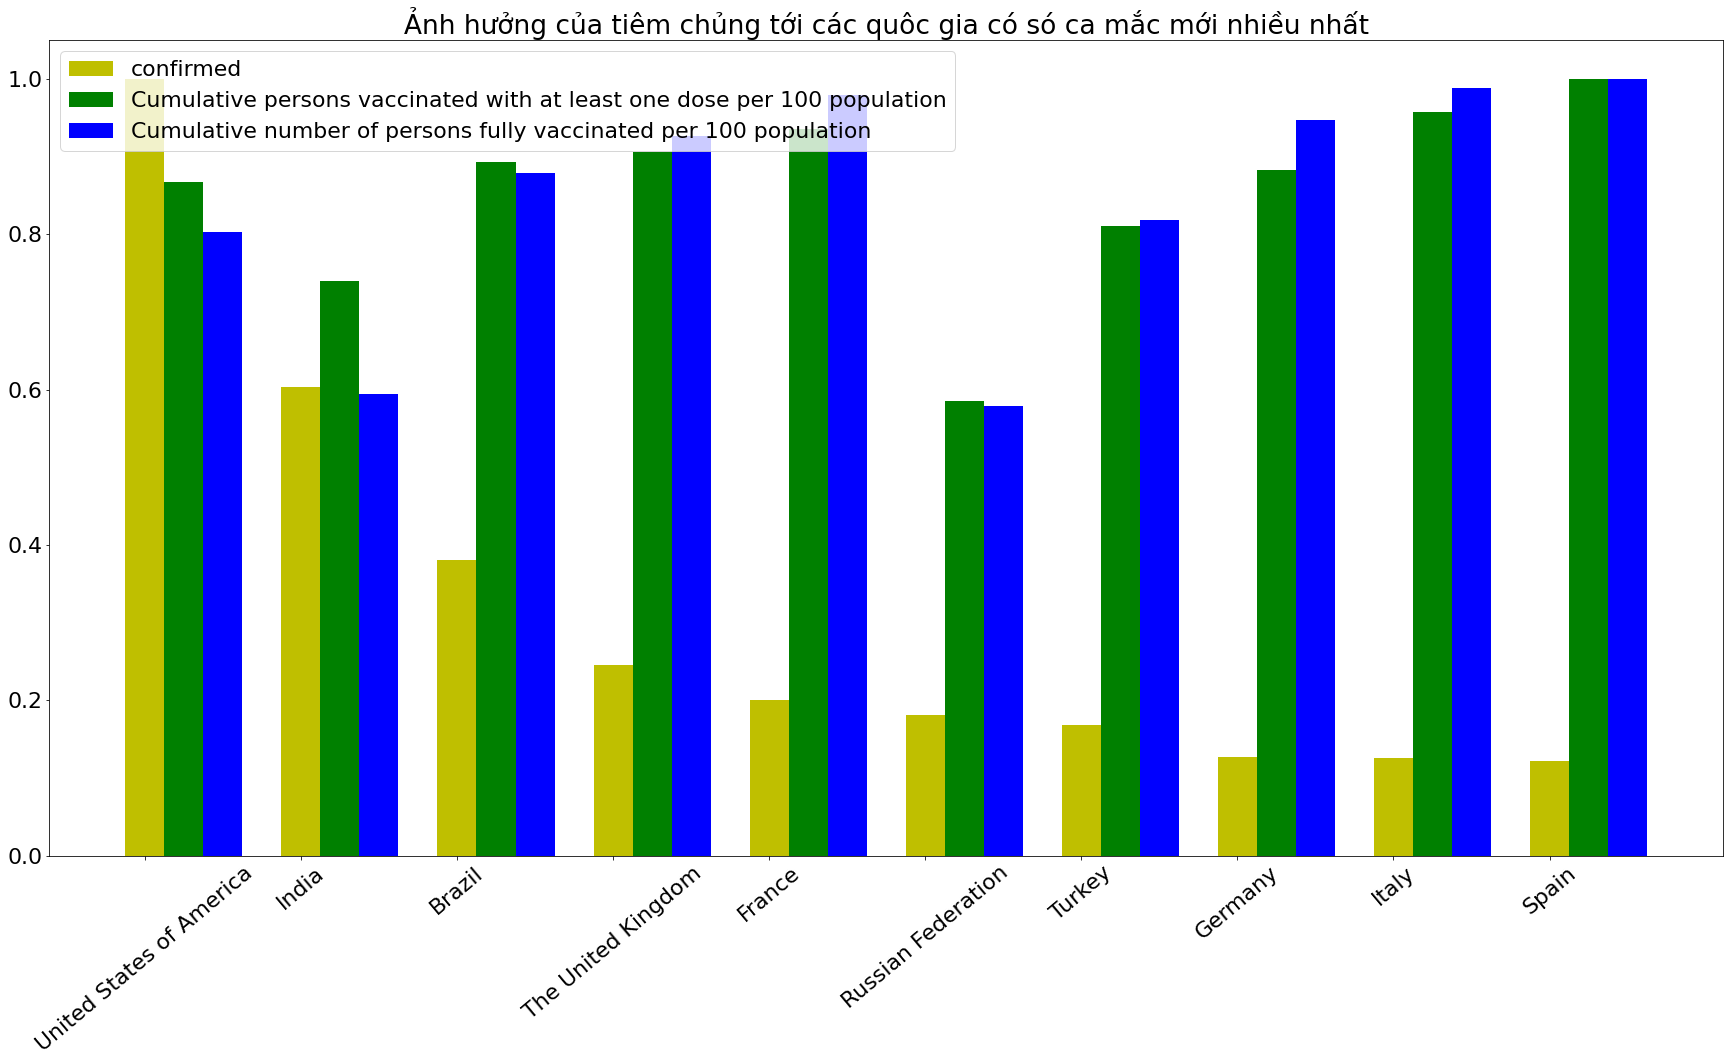

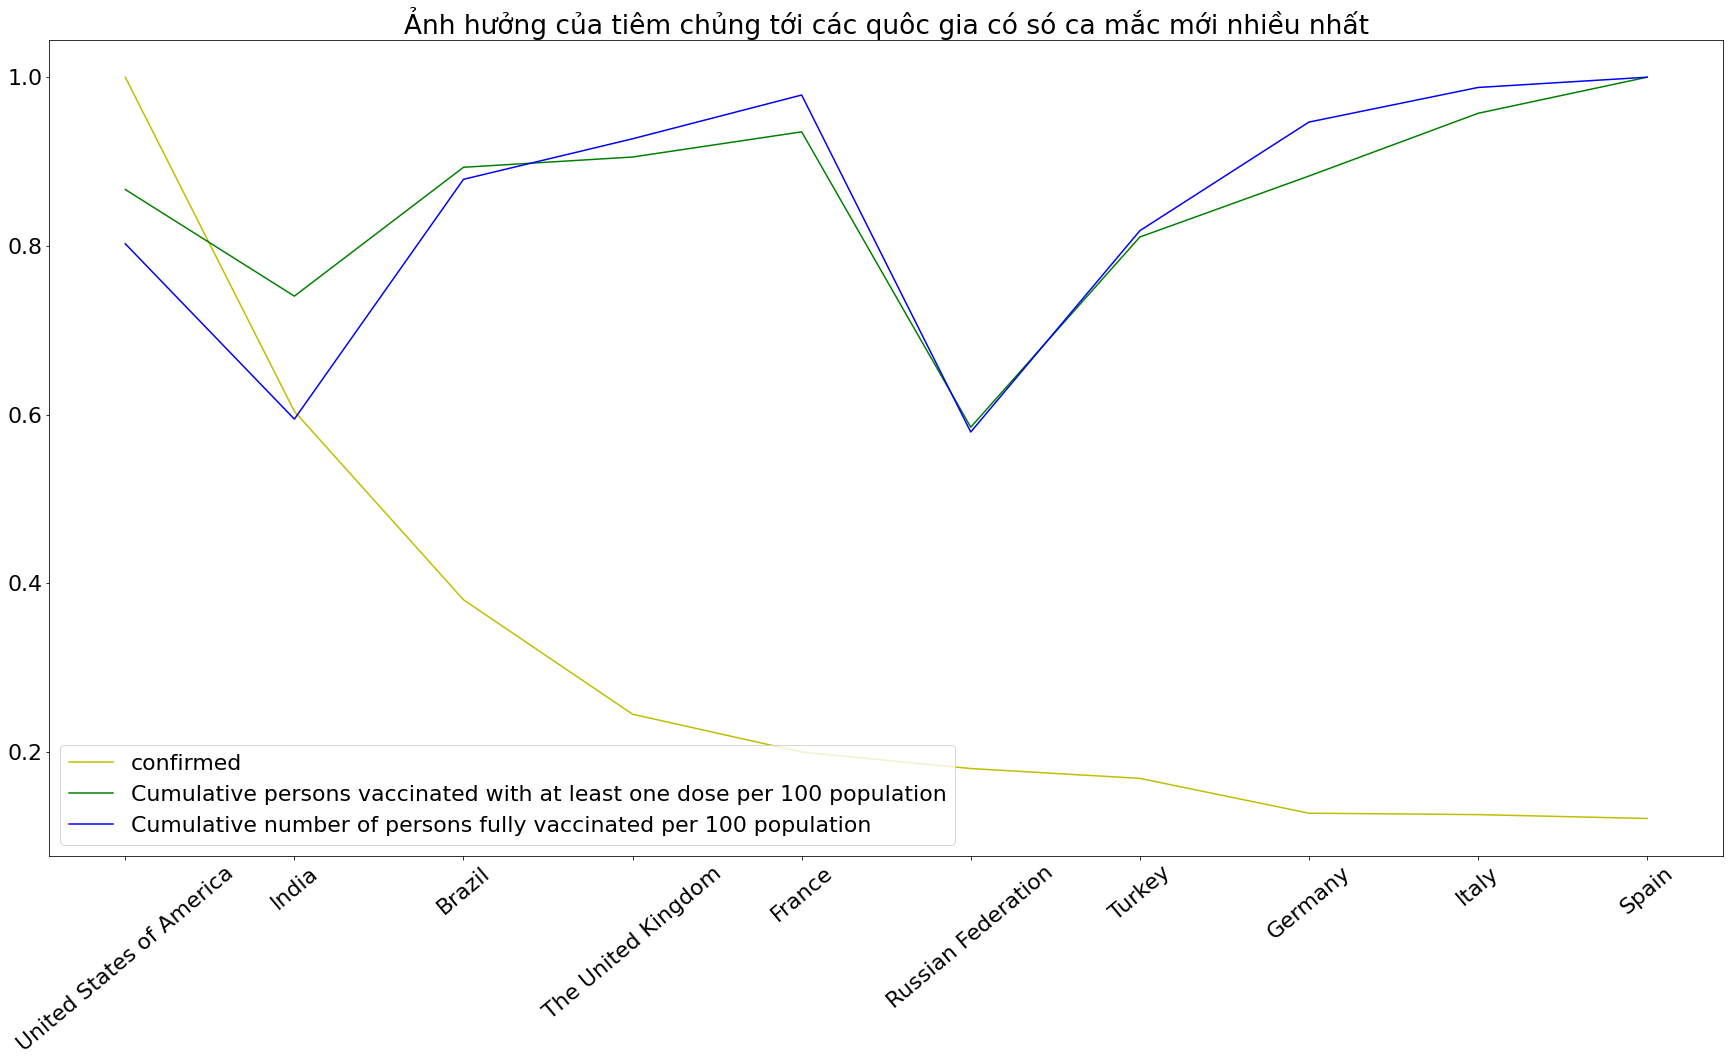

In [48]:
total_confirmed_case_and_vaccine=total_confirmed_case.head(10)
total_confirmed_case_and_vaccine=pd.merge(total_confirmed_case_and_vaccine, vaccin_data, left_on="Country", right_on="COUNTRY")

total_confirmed_list=total_confirmed_case_and_vaccine['Cumulative_cases'].values.tolist()
total_confirmed_list=total_confirmed_list/np.max(total_confirmed_list)
print(total_confirmed_list)
total_PERSONS_VACCINATED_1PLUS_DOSE_PER100_list=total_confirmed_case_and_vaccine['PERSONS_VACCINATED_1PLUS_DOSE_PER100'].values.tolist()
total_PERSONS_VACCINATED_1PLUS_DOSE_PER100_list=total_PERSONS_VACCINATED_1PLUS_DOSE_PER100_list/np.max(total_PERSONS_VACCINATED_1PLUS_DOSE_PER100_list)
print(total_PERSONS_VACCINATED_1PLUS_DOSE_PER100_list)
total_PERSONS_FULLY_VACCINATED_PER100_list=total_confirmed_case_and_vaccine['PERSONS_FULLY_VACCINATED_PER100'].values.tolist()
total_PERSONS_FULLY_VACCINATED_PER100_list=total_PERSONS_FULLY_VACCINATED_PER100_list/np.max(total_PERSONS_FULLY_VACCINATED_PER100_list)
print(total_PERSONS_FULLY_VACCINATED_PER100_list)

list_country=total_confirmed_case_and_vaccine['Country'].values.tolist()
plt.figure(figsize=(30,15))
list_country_axis=np.arange(len(list_country))

width = 0.25

plt.bar(list_country_axis, total_confirmed_list ,width, label = 'confirmed', color='y')
plt.bar(list_country_axis+width, total_PERSONS_VACCINATED_1PLUS_DOSE_PER100_list,width, label = 'Cumulative persons vaccinated with at least one dose per 100 population', color='g')
plt.bar(list_country_axis+width*2, total_PERSONS_FULLY_VACCINATED_PER100_list,width, label = 'Cumulative number of persons fully vaccinated per 100 population', color='b')
plt.xticks(list_country_axis,list_country, rotation=40)
plt.title("Ảnh hưởng của tiêm chủng tới các quôc gia có só ca mắc mới nhiều nhất")
plt.legend()
plt.show()

plt.figure(figsize=(30,15))
plt.plot(list_country, total_confirmed_list , label = 'confirmed', color='y')
plt.plot(list_country, total_PERSONS_VACCINATED_1PLUS_DOSE_PER100_list, label = 'Cumulative persons vaccinated with at least one dose per 100 population', color='g')
plt.plot(list_country, total_PERSONS_FULLY_VACCINATED_PER100_list, label = 'Cumulative number of persons fully vaccinated per 100 population', color='b')
plt.xticks(rotation=40)
plt.title("Ảnh hưởng của tiêm chủng tới các quôc gia có só ca mắc mới nhiều nhất")
plt.legend()
plt.show()

## Ảnh hưởng của vaccine đến số ca tử vong tại các quốc gia

[1.         0.7466116  0.58282089 0.38165847 0.36166531 0.24450281
 0.18083566 0.17358798 0.16744828 0.15882524]
[0.90560223 0.93315355 0.77357459 0.61126162 0.78815181 0.92027887
 0.94586668 0.75821445 1.         0.88866382]
[0.81241756 0.88975477 0.60198121 0.586503   0.69377372 0.86964656
 0.93842365 0.56437589 1.         0.84177232]


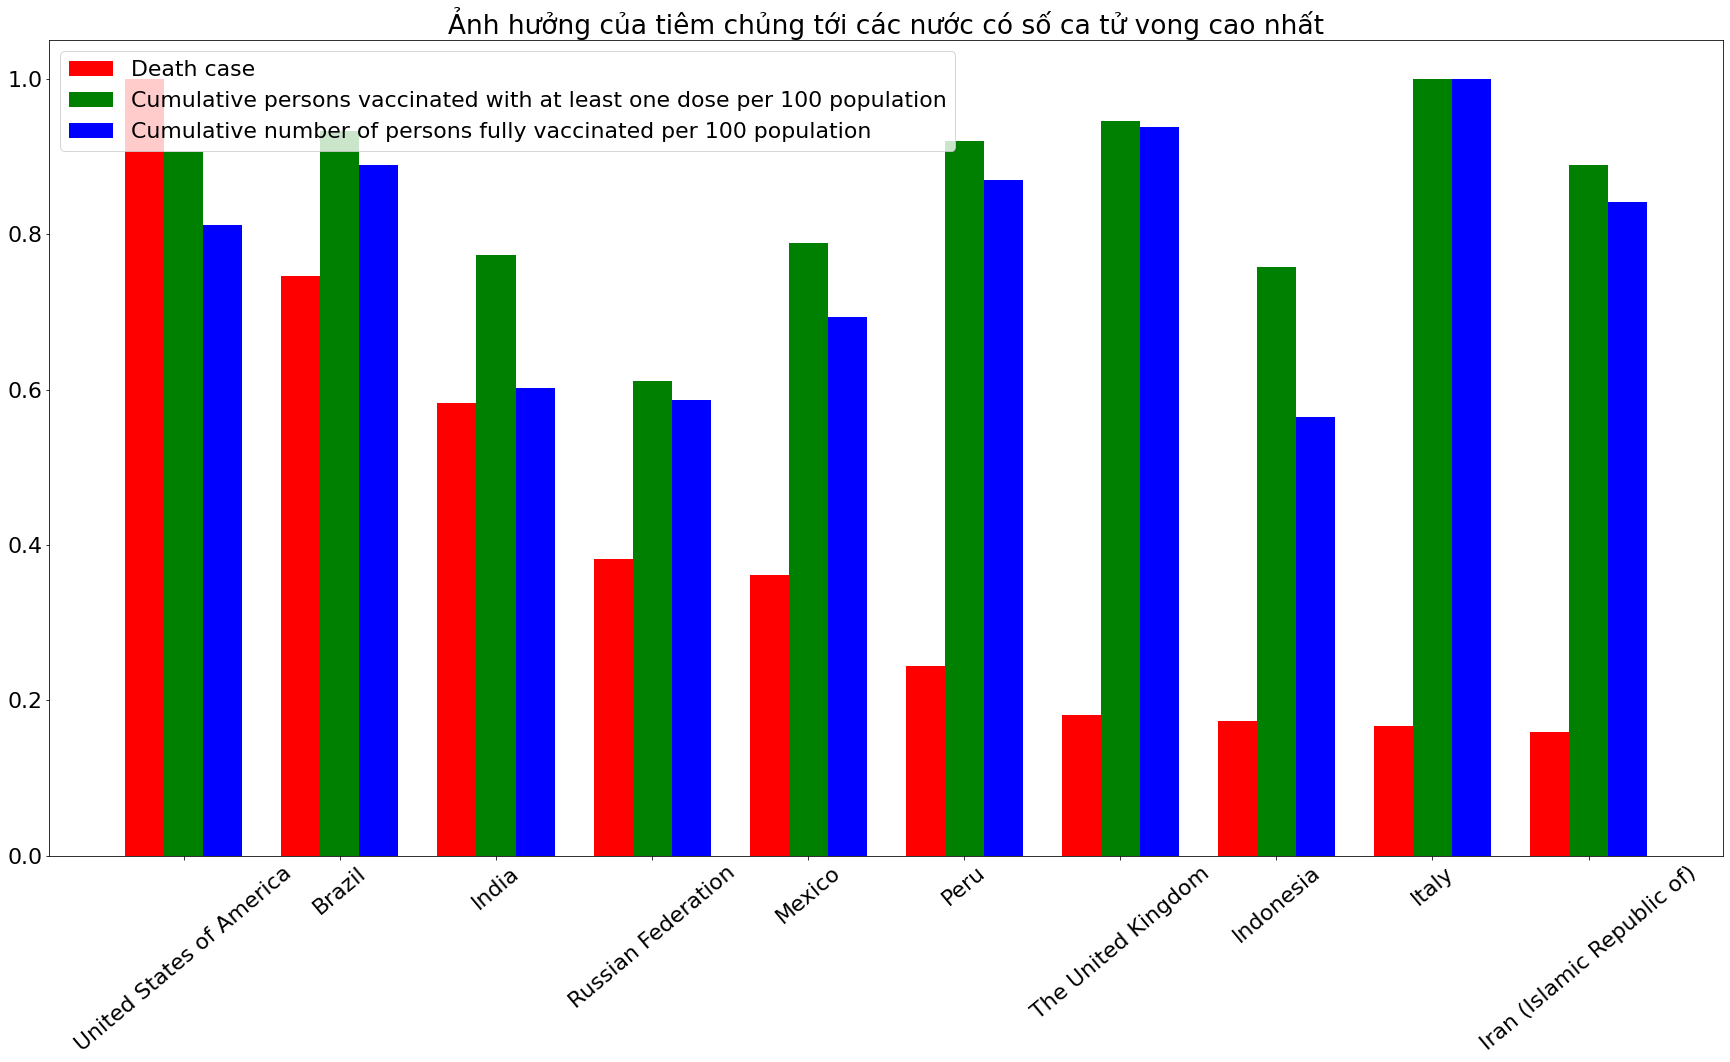

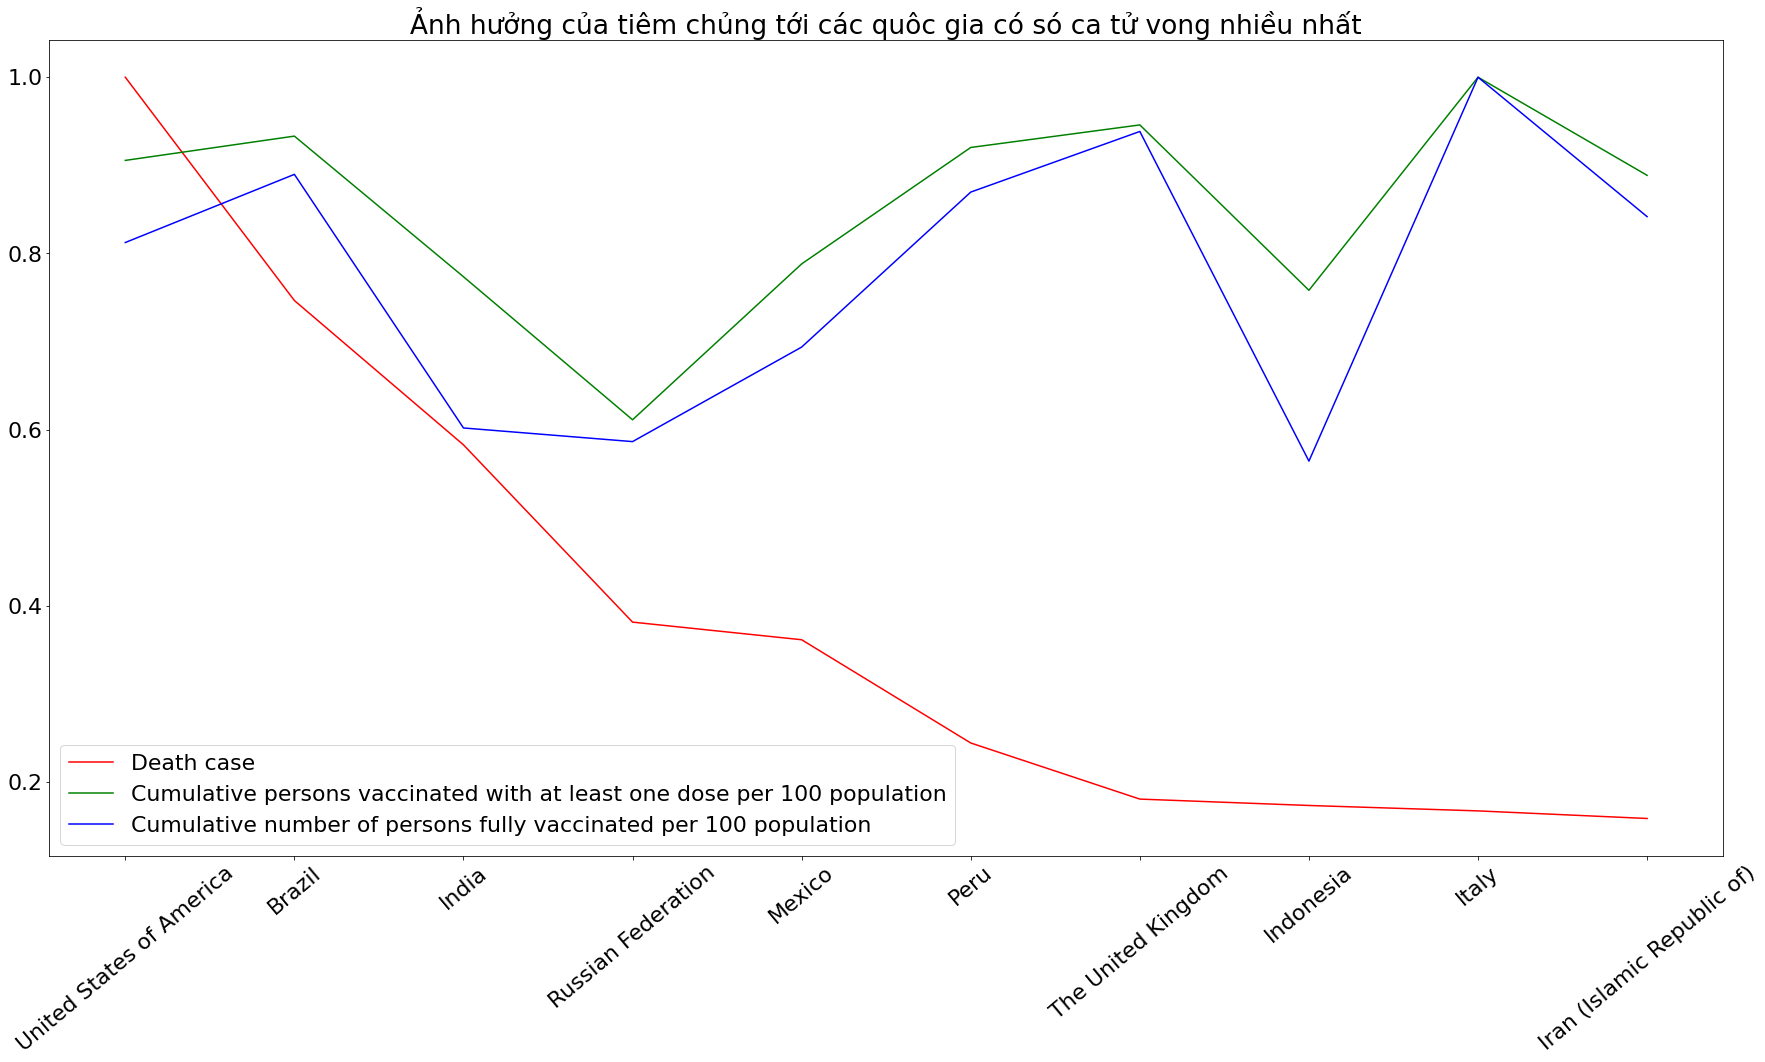

In [49]:
total_death_case_and_vaccine=total_death_case.head(10)
total_death_case_and_vaccine=pd.merge(total_death_case_and_vaccine, vaccin_data, left_on="Country", right_on="COUNTRY")

total_death_list=total_death_case_and_vaccine['Cumulative_deaths'].values.tolist()
total_death_list=total_death_list/np.max(total_death_list)
print(total_death_list)
total_PERSONS_VACCINATED_1PLUS_DOSE_PER100_list=total_death_case_and_vaccine['PERSONS_VACCINATED_1PLUS_DOSE_PER100'].values.tolist()
total_PERSONS_VACCINATED_1PLUS_DOSE_PER100_list=total_PERSONS_VACCINATED_1PLUS_DOSE_PER100_list/np.max(total_PERSONS_VACCINATED_1PLUS_DOSE_PER100_list)
print(total_PERSONS_VACCINATED_1PLUS_DOSE_PER100_list)
total_PERSONS_FULLY_VACCINATED_PER100_list=total_death_case_and_vaccine['PERSONS_FULLY_VACCINATED_PER100'].values.tolist()
total_PERSONS_FULLY_VACCINATED_PER100_list=total_PERSONS_FULLY_VACCINATED_PER100_list/np.max(total_PERSONS_FULLY_VACCINATED_PER100_list)
print(total_PERSONS_FULLY_VACCINATED_PER100_list)

list_country=total_death_case_and_vaccine['Country'].values.tolist()
plt.figure(figsize=(30,15))
list_country_axis=np.arange(len(list_country))

width = 0.25

plt.bar(list_country_axis, total_death_list,width , label = 'Death case', color='red')
plt.bar(list_country_axis+width, total_PERSONS_VACCINATED_1PLUS_DOSE_PER100_list,width, label = 'Cumulative persons vaccinated with at least one dose per 100 population', color='g')
plt.bar(list_country_axis+width*2, total_PERSONS_FULLY_VACCINATED_PER100_list, width, label = 'Cumulative number of persons fully vaccinated per 100 population', color='b')
plt.xticks(list_country_axis+width, list_country, rotation=40)
plt.title("Ảnh hưởng của tiêm chủng tới các nước có số ca tử vong cao nhất")
plt.legend()
plt.show()

plt.figure(figsize=(30,15))
plt.plot(list_country, total_death_list , label = 'Death case', color='red')
plt.plot(list_country, total_PERSONS_VACCINATED_1PLUS_DOSE_PER100_list, label = 'Cumulative persons vaccinated with at least one dose per 100 population', color='g')
plt.plot(list_country, total_PERSONS_FULLY_VACCINATED_PER100_list, label = 'Cumulative number of persons fully vaccinated per 100 population', color='b')
plt.xticks(rotation=40)
plt.title("Ảnh hưởng của tiêm chủng tới các quôc gia có só ca tử vong nhiều nhất")
plt.legend()
plt.show()

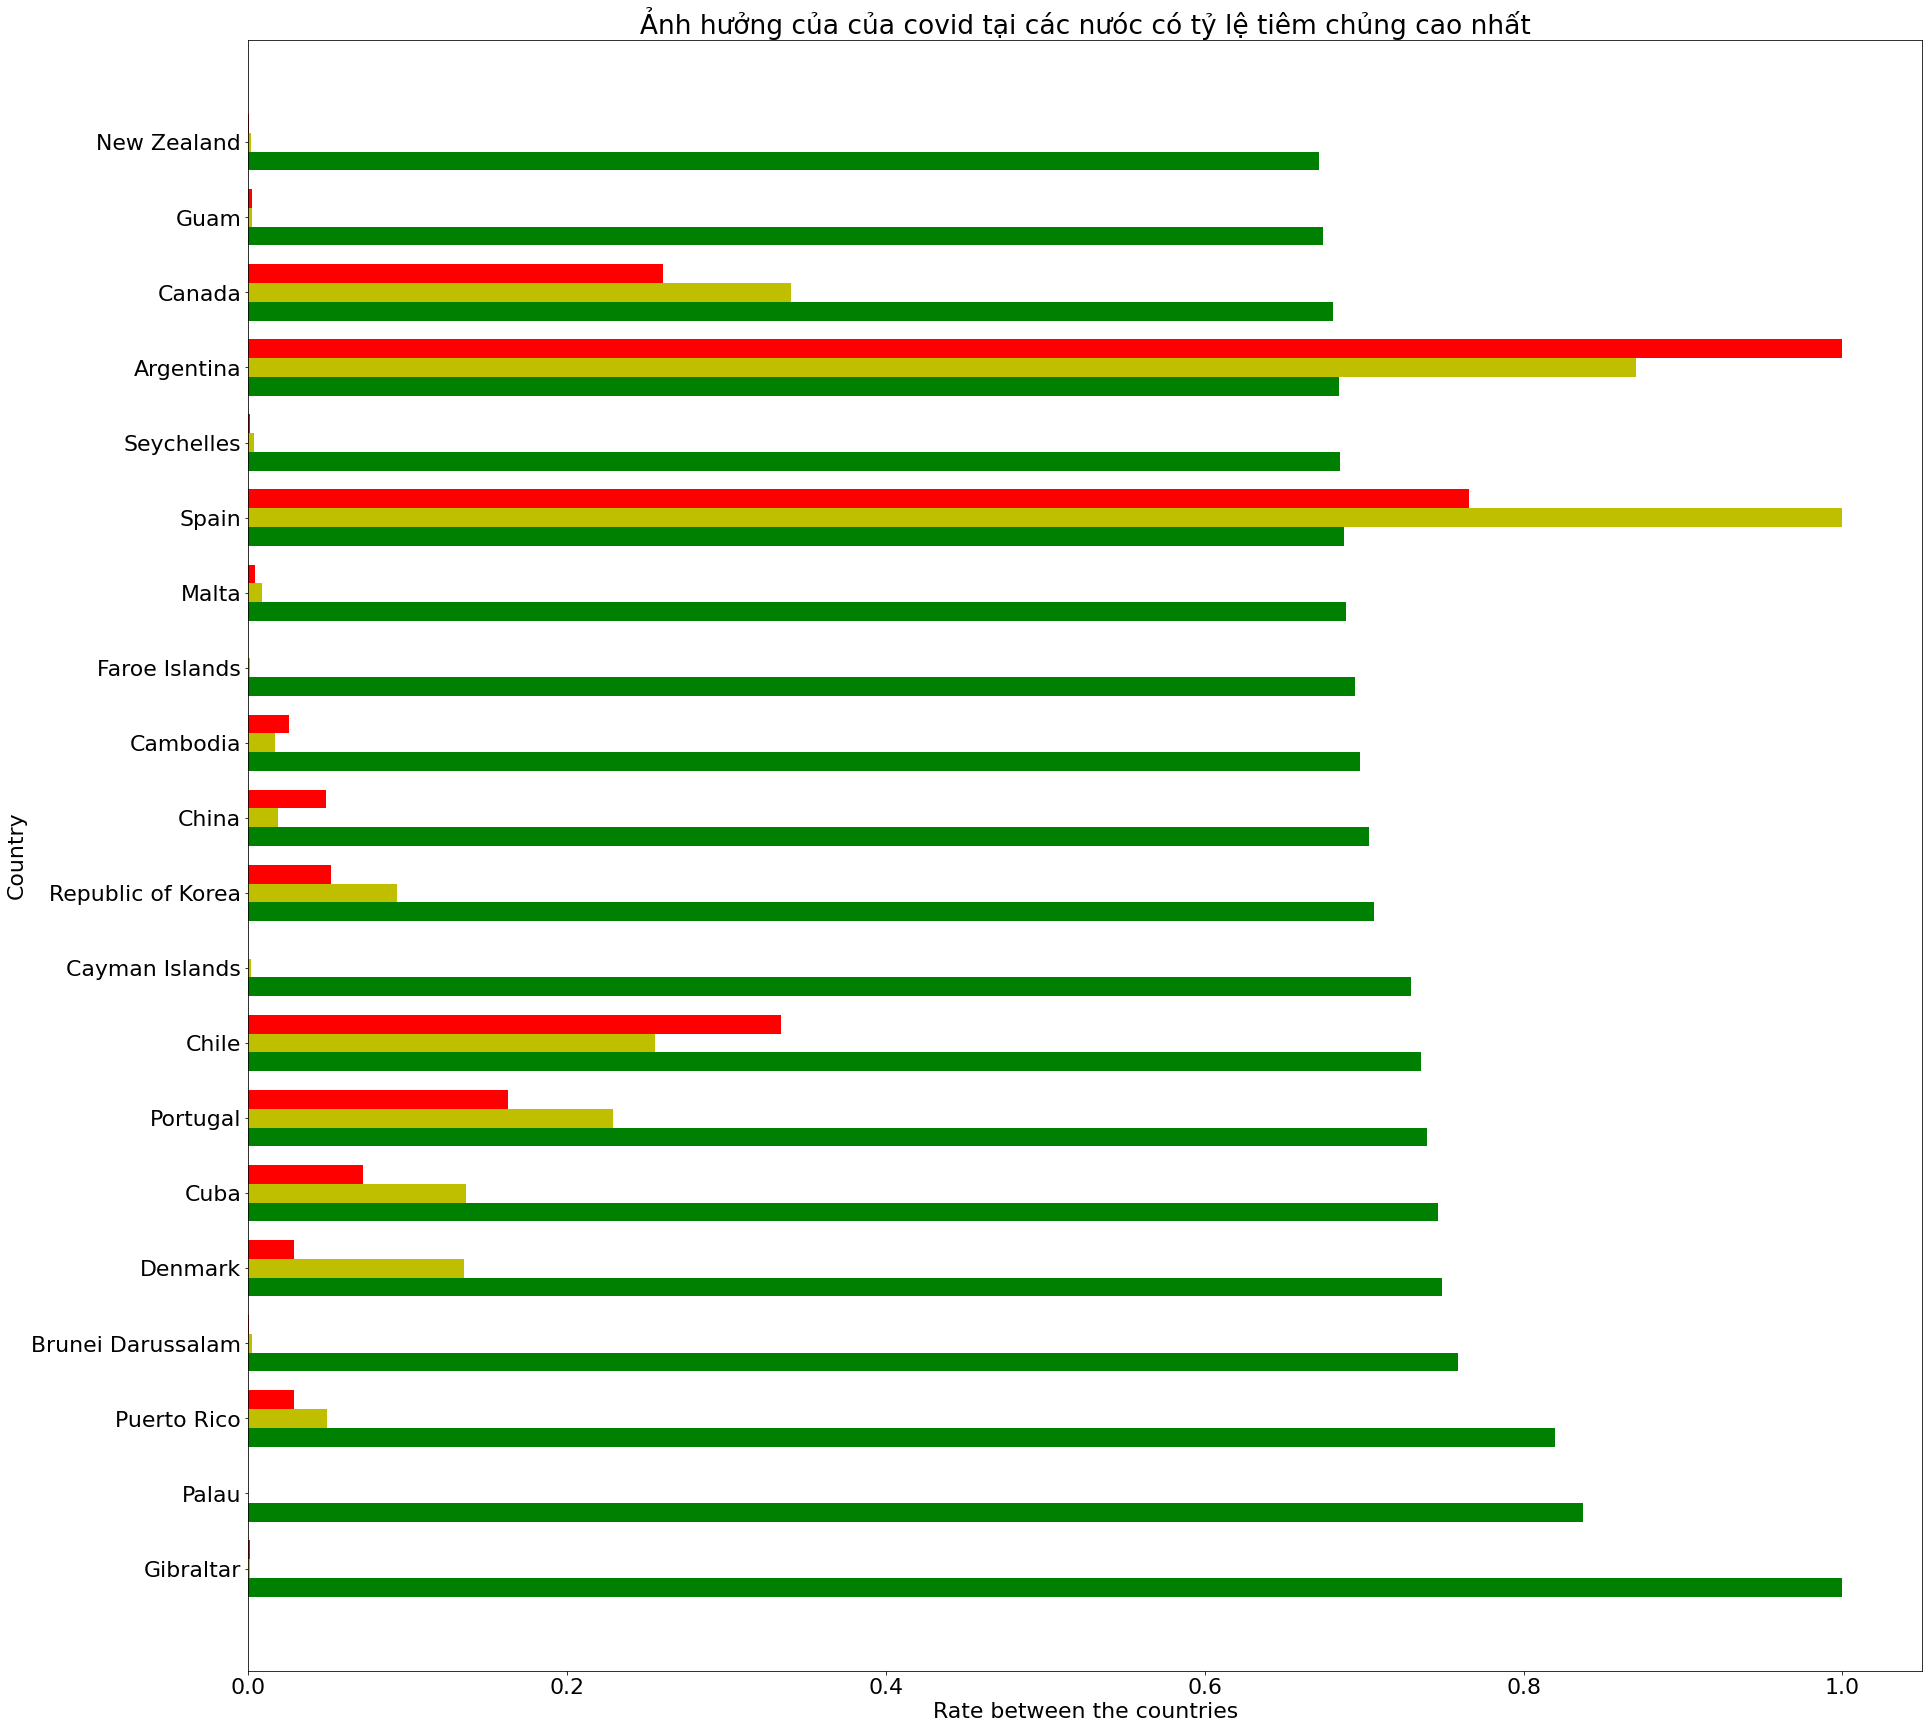

In [84]:
vaccin_data_PERSONS_VACCINATED_1PLUS_DOSE_PER100=vaccin_data.sort_values(by='PERSONS_VACCINATED_1PLUS_DOSE_PER100', ascending=False)
# vaccin_data_PERSONS_VACCINATED_1PLUS_DOSE_PER100=vaccin_data_PERSONS_VACCINATED_1PLUS_DOSE_PER100.head(20)
vaccin_data_PERSONS_VACCINATED_1PLUS_DOSE_PER100=pd.merge(vaccin_data_PERSONS_VACCINATED_1PLUS_DOSE_PER100, total_confirmed_case, left_on="COUNTRY", right_on="Country")
vaccin_data_PERSONS_VACCINATED_1PLUS_DOSE_PER100=pd.merge(vaccin_data_PERSONS_VACCINATED_1PLUS_DOSE_PER100, total_death_case, left_on="COUNTRY", right_on="Country")
vaccin_data_PERSONS_VACCINATED_1PLUS_DOSE_PER100



top_vaccine=vaccin_data_PERSONS_VACCINATED_1PLUS_DOSE_PER100.sort_values(by='PERSONS_VACCINATED_1PLUS_DOSE_PER100', ascending=False).head(20)
list_deaths=top_vaccine['Cumulative_deaths'].values.tolist()
list_deaths=list_deaths/np.max(list_deaths)
list_confirmed=top_vaccine['Cumulative_cases'].values.tolist()
list_confirmed=list_confirmed/np.max(list_confirmed)

list_vaccine=top_vaccine_and_death['PERSONS_VACCINATED_1PLUS_DOSE_PER100'].values.tolist()
list_vaccine=list_vaccine/np.max(list_vaccine)
list_x=top_vaccine_and_death['COUNTRY']

width=0.25
len_list_x=np.arange(len(list_x))
# top_vaccine=top_vaccine[['PERSONS_VACCINATED_1PLUS_DOSE_PER100', 'Cumulative_deaths','Cumulative_cases','COUNTRY']]
# top_vaccine.set_index('COUNTRY')
# top_vaccine['PERSONS_VACCINATED_1PLUS_DOSE_PER100']=top_vaccine['PERSONS_VACCINATED_1PLUS_DOSE_PER100']/top_vaccine['PERSONS_VACCINATED_1PLUS_DOSE_PER100'].max()
# top_vaccine['Cumulative_deaths']=top_vaccine['Cumulative_deaths']/top_vaccine['Cumulative_deaths'].max()
# top_vaccine['Cumulative_cases']=top_vaccine['Cumulative_cases']/top_vaccine['Cumulative_cases'].max()
# top_vaccine.plot.barh(color=['g', 'r', 'y'])


# plt.figure(figsize=(30,30))
fig, ax = plt.subplots()
plt.rcParams["figure.figsize"] = (30,30)
plt.barh( len_list_x ,list_vaccine,width ,color='g', label='Tỷ lệ tiêm chủng')
plt.barh(len_list_x+width ,list_confirmed,width, color= 'y', label='Số ca mắc')
plt.barh(len_list_x+width*2,list_deaths,width, color= 'r', label='Số ca tử vong')
ax.set(yticks=len_list_x + width, yticklabels=list_x)
plt.title("Ảnh hưởng của của covid tại các nưóc có tỷ lệ tiêm chủng cao nhất")
plt.xlabel('Rate between the countries')
plt.ylabel('Country')
plt.show()

## Số ca tại Việt Nam trong 30 ngày gần đây

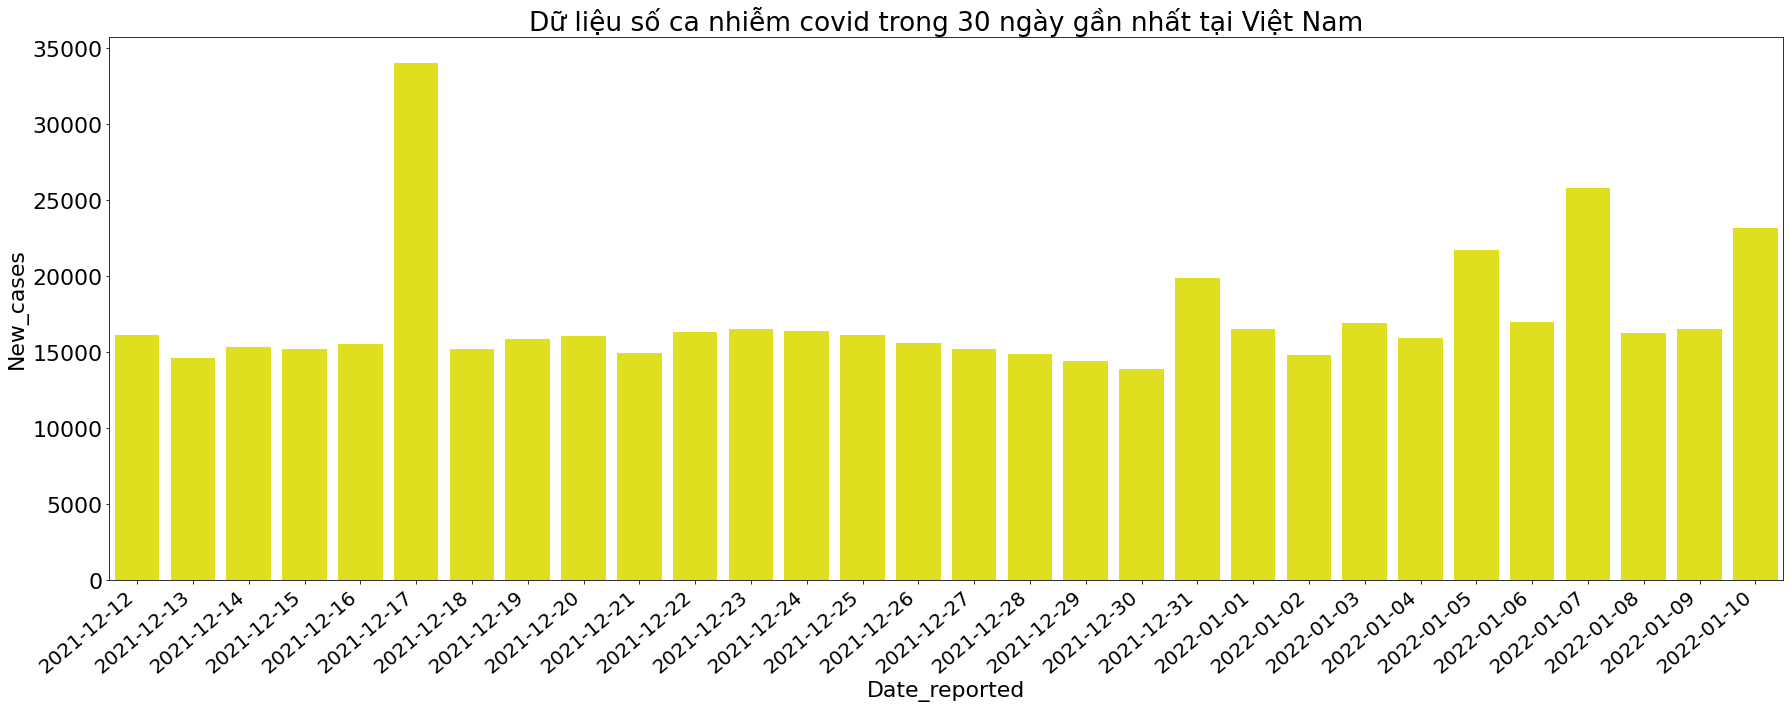

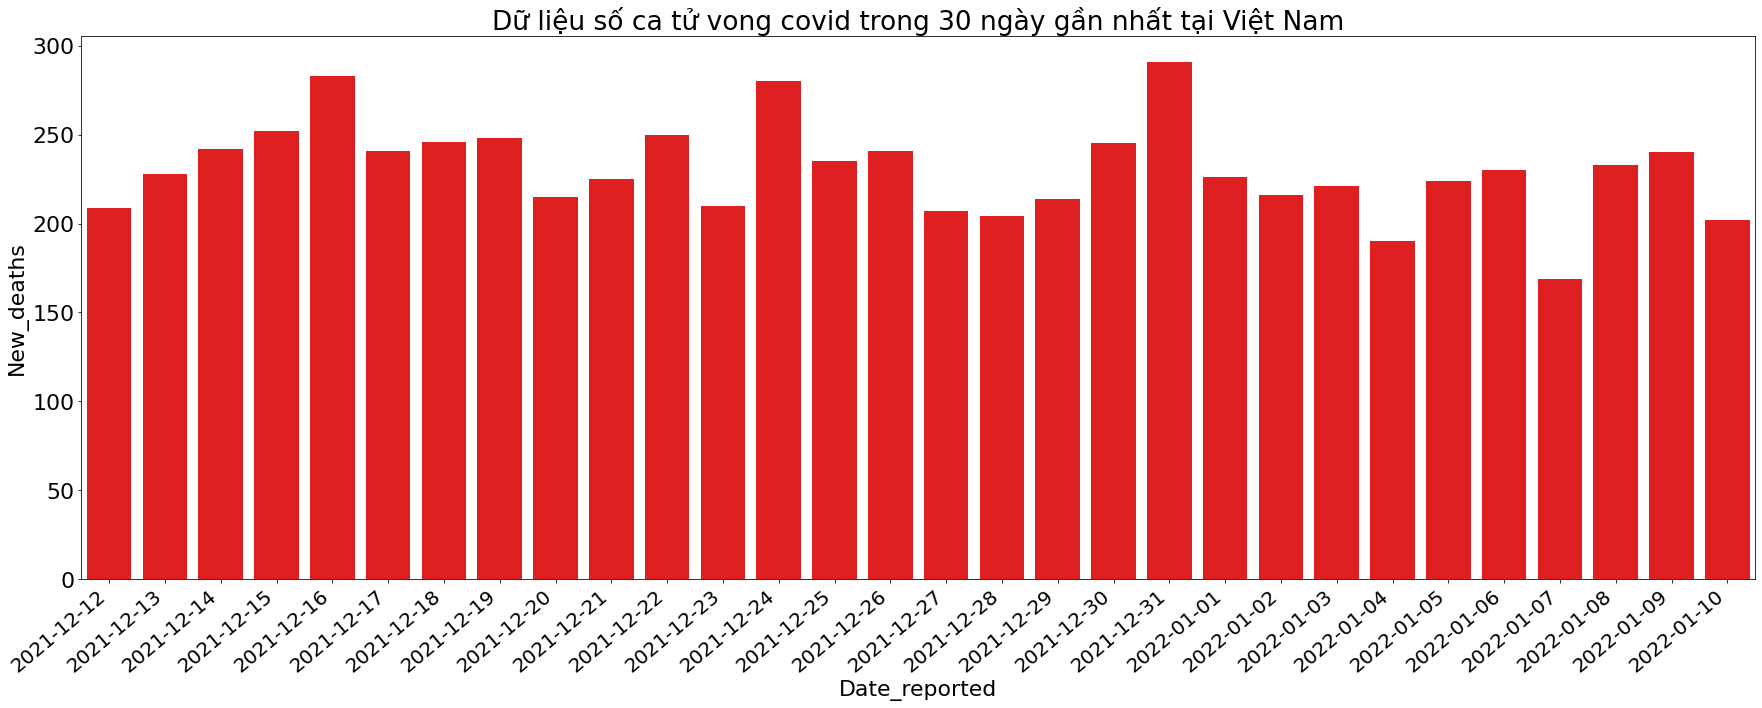

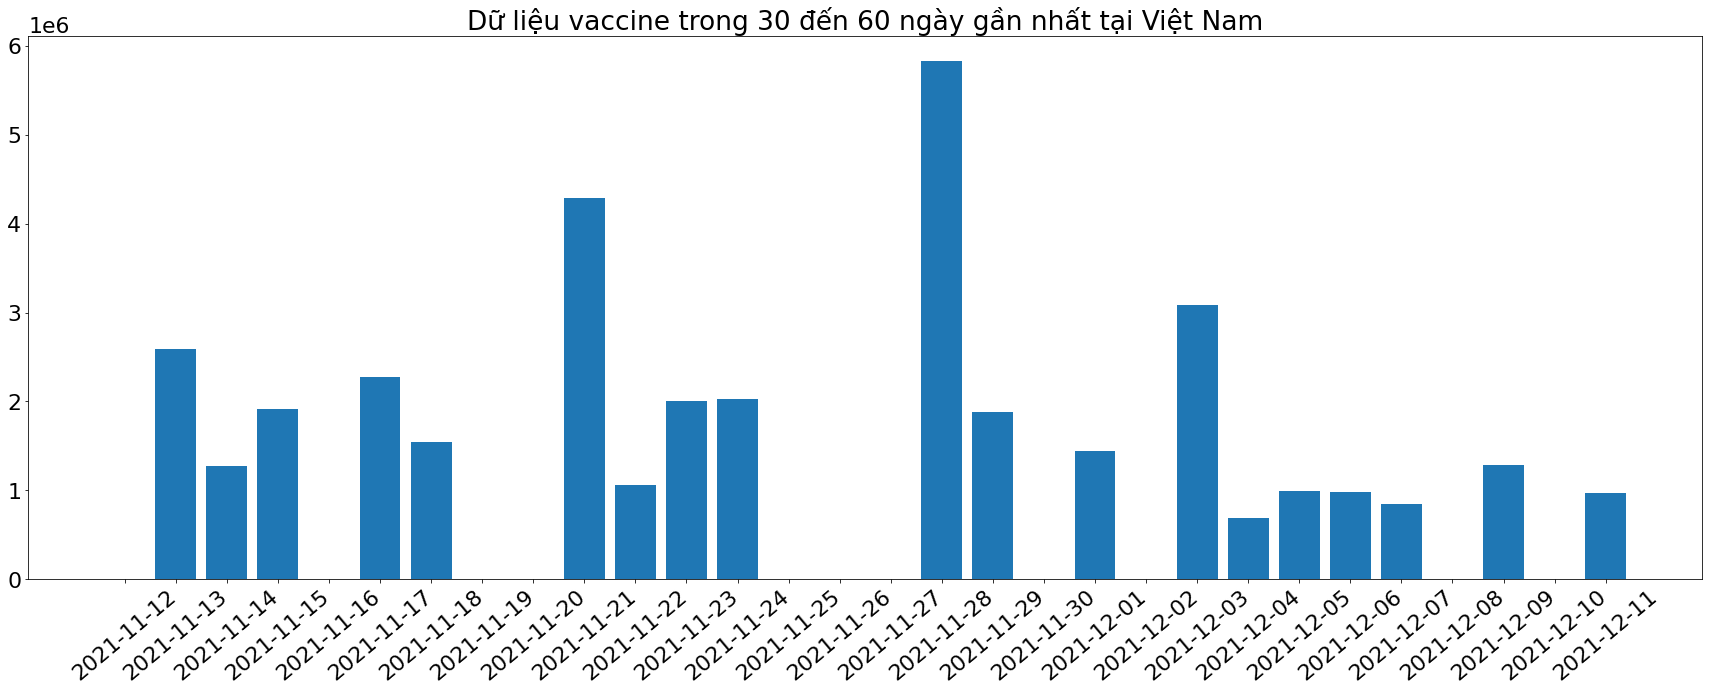

In [52]:

who_data_vn=who_data[who_data['Country']=='Viet Nam'].tail(30)
# who_data_vn=who_data_vn.drop('Country_code', 1)
plt.figure(figsize=(30,10))
ax=sns.barplot(x='Date_reported', y='New_cases', data=who_data_vn, color="yellow")
plt.title("Dữ liệu số ca nhiễm covid trong 30 ngày gần nhất tại Việt Nam")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20,rotation=40, ha="right")
plt.show()
plt.figure(figsize=(30,10))
ax=sns.barplot(x='Date_reported', y='New_deaths', data=who_data_vn, color="red")
plt.title("Dữ liệu số ca tử vong covid trong 30 ngày gần nhất tại Việt Nam")
ax.set_xticklabels(ax.get_xticklabels(), fontsize=20,rotation=40, ha="right")
plt.show()

vaccine=vaccine_dosses_admin.copy()
vaccine=vaccine.drop('UID', 1)
vaccine=vaccine.drop('FIPS',1)
vaccine=vaccine.drop('iso3',1)
vaccine=vaccine.drop('Admin2', 1)
vaccine=vaccine.drop('iso2',1)
vaccine=vaccine.drop('code3', 1)
vaccine=vaccine.drop('Province_State', 1)
vaccine=vaccine.drop('Lat', 1)
vaccine=vaccine.drop('Long_', 1)
vaccine=vaccine.drop('Combined_Key', 1)
vaccine=vaccine.drop('Population', 1)
vaccine=vaccine.fillna(0)
vaccine=vaccine.groupby('Country_Region', as_index=False).sum()
vaccine=vaccine.astype(dict.fromkeys(vaccine.columns[1:], 'float64'),errors='ignore')
list_day_vaccine=vaccine.columns.tolist()[1:]
list_day_vaccine.reverse()
for i in range(len(list_day_vaccine)):
    if  i != len(list_day_vaccine)-1:
        vaccine[list_day_vaccine[i]]=vaccine[list_day_vaccine[i]]-vaccine[list_day_vaccine[i+1]]

countries=['Vietnam']
days_recent=[30]

vaccine_country=vaccine[vaccine['Country_Region']==countries[0]]
list_days_recent=vaccine_country.columns.tolist()[-60:-30]
list_days_recent
vaccine_country=vaccine.loc[vaccine.Country_Region == countries[0],list_days_recent].values.flatten().tolist()
plt.figure(figsize=(30,10))
plt.bar(list_days_recent,vaccine_country)
plt.xticks(rotation=40)
plt.title("Dữ liệu vaccine trong 30 đến 60 ngày gần nhất tại Việt Nam")
plt.show()

# Diễn biến dịch trong năm tại Việt nam theo các tháng trong năm 2021

<ipython-input-53-831ab16c5c4d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  who_data_add_date['Date_reported']=pd.to_datetime(who_data_add_date['Date_reported'], format='%Y-%m-%d')
<ipython-input-53-831ab16c5c4d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  who_data_add_date['month']=who_data_add_date['Date_reported'].dt.month.astype("str")+str('-')+who_data_add_date['Date_reported'].dt.year.astype("str")
<ipython-input-53-831ab16c5c4d>:5: FutureWarning: Indexing with multiple keys (implicitly conv

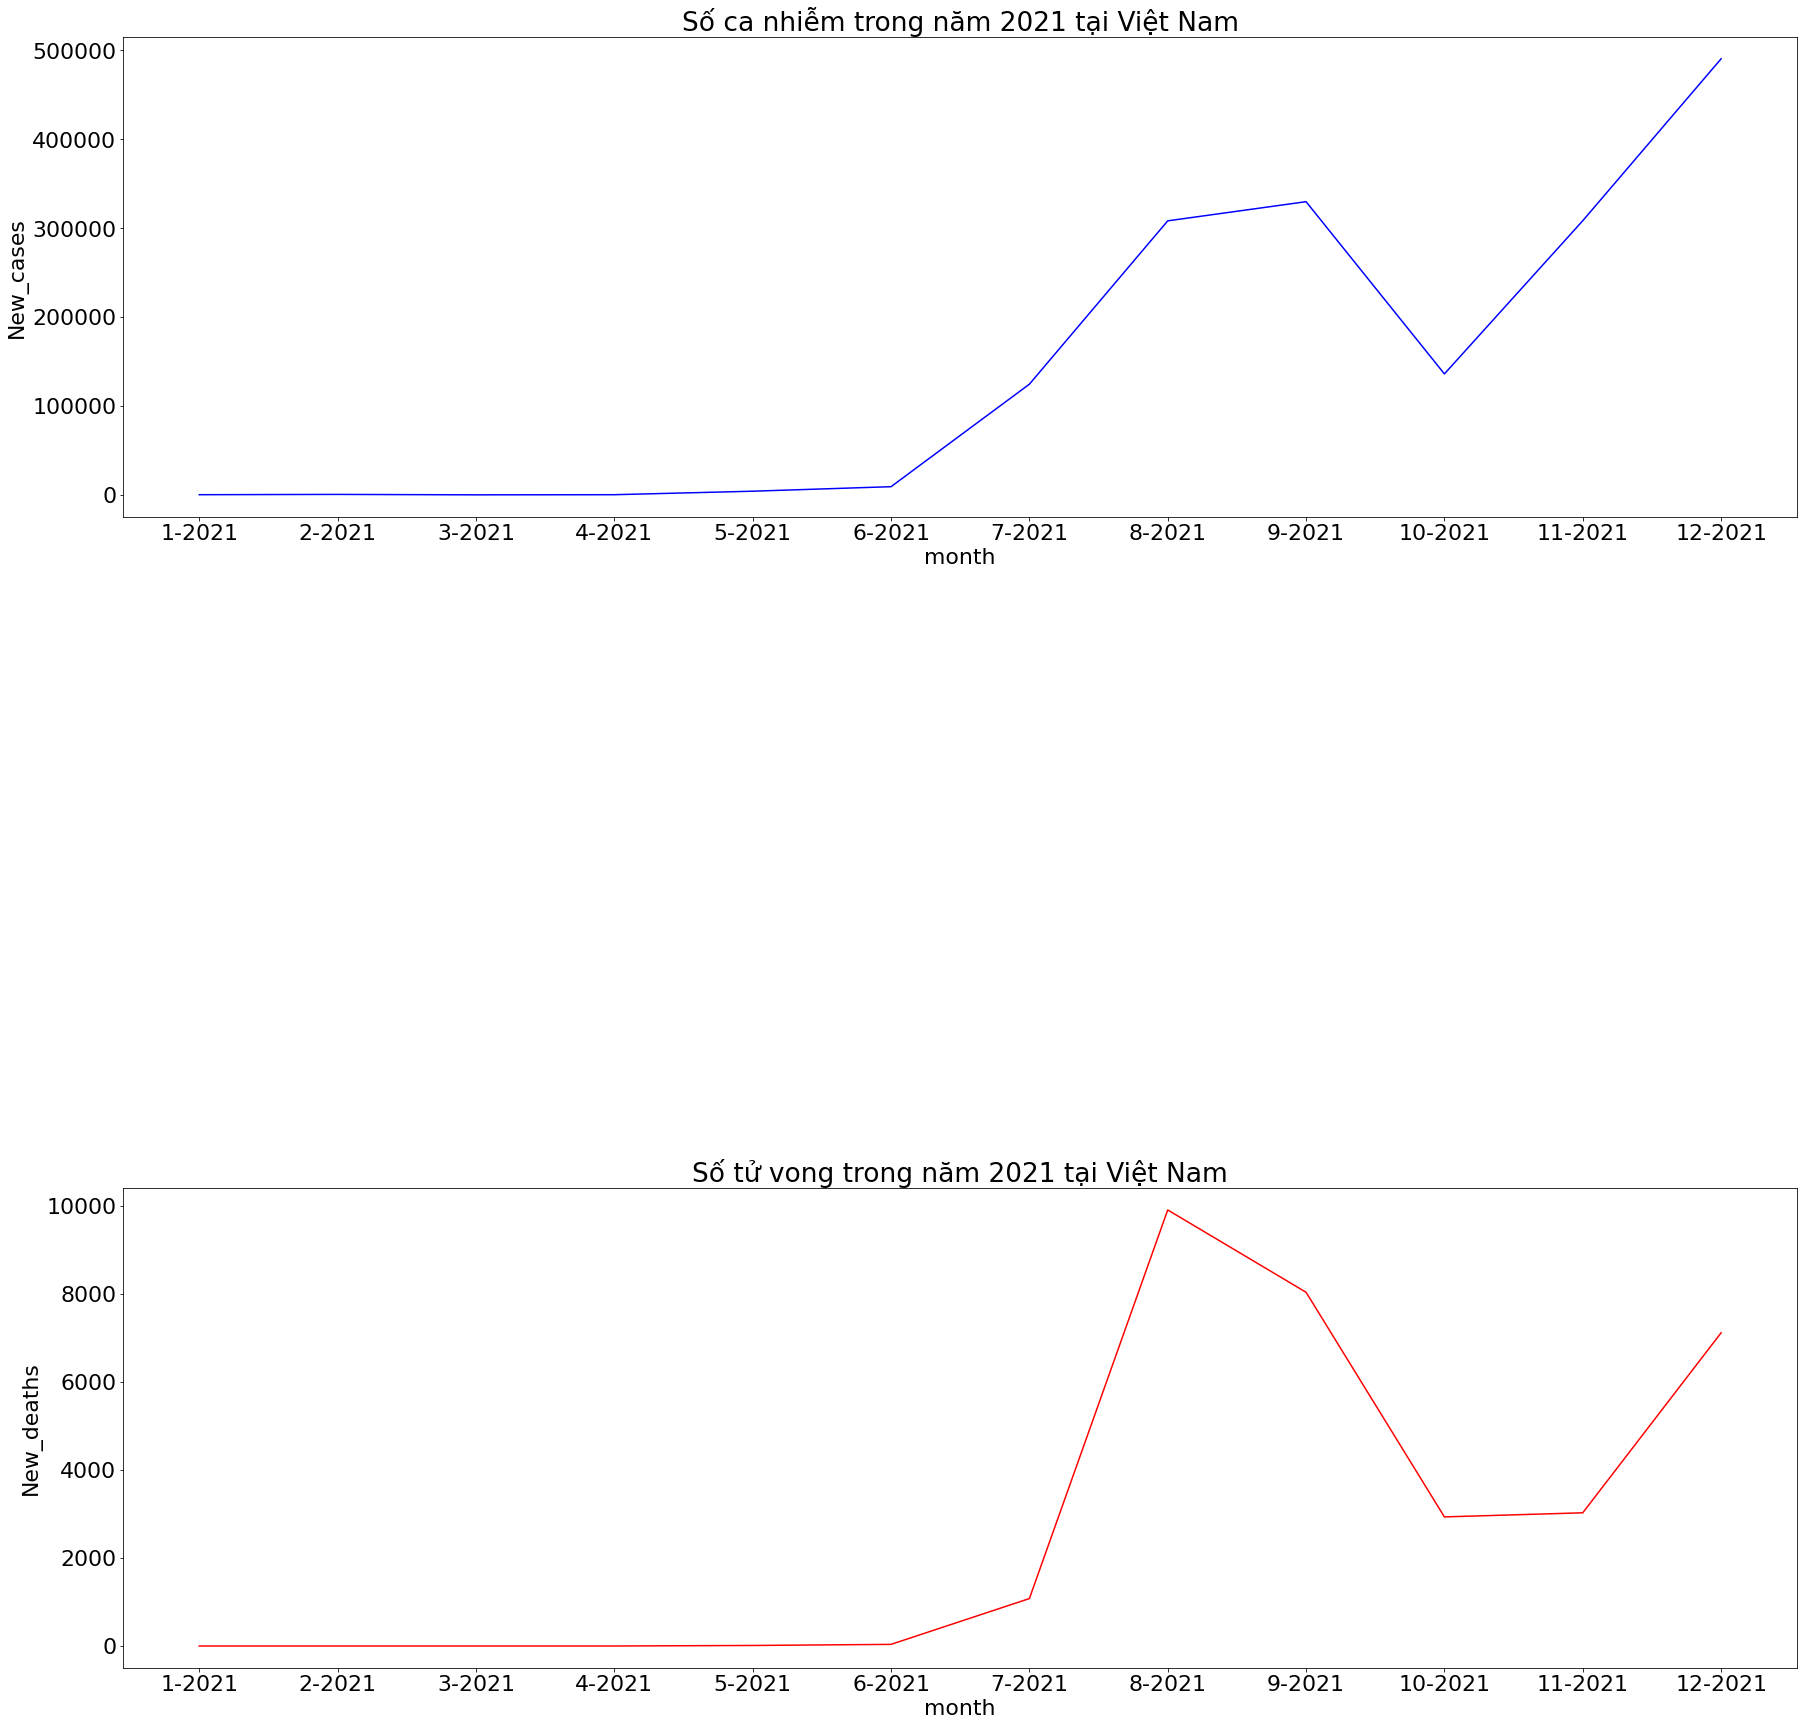

In [53]:
who_data_add_date=who_data[who_data['Country']=="Viet Nam"]
who_data_add_date['Date_reported']=pd.to_datetime(who_data_add_date['Date_reported'], format='%Y-%m-%d')
who_data_add_date
who_data_add_date['month']=who_data_add_date['Date_reported'].dt.month.astype("str")+str('-')+who_data_add_date['Date_reported'].dt.year.astype("str")
who_data_add_date_case=pd.DataFrame(who_data_add_date.groupby('month', as_index=False)['New_cases', 'New_deaths'].sum())
who_data_add_date_case['date']=pd.to_datetime(who_data_add_date_case['month'], format='%m-%Y')
who_data_add_date_case=who_data_add_date_case.sort_values(by=['date'], ascending=True)
year=2021
plt.figure(figsize=(30,30))
plt.subplot(311)
sns.lineplot(y='New_cases', x='month', data=who_data_add_date_case[who_data_add_date_case['date'].dt.year==year], color='blue')
plt.title('Số ca nhiễm trong năm {} tại Việt Nam'.format(year))
plt.subplot(313)
sns.lineplot(y='New_deaths', x='month', data=who_data_add_date_case[who_data_add_date_case['date'].dt.year==year], color='red')
plt.title('Số tử vong trong năm {} tại Việt Nam'.format(year))
plt.show()